# Modeller
All baselines are run on the same test set i.e. a subset of the original data set. 
The baselines included in this script are:
- Random model - choosing and ranking candidates randomly from the test set
- Plain Mergesort model - choosing and ranking candidates from the test set based on best grades in high school
- Mergesort w. gender accountability - choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking)
- Plain Xgboost regression model -
- Xgboost regression model without sensitive attributes - 

Fair model:
- Xgboost regression model account for diversity 

## Load packages

In [9]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np
import random 
from sklearn.utils import shuffle

## Plots setup

In [10]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (14,5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Load dataset

In [11]:
# df = pd.read_csv("df_sum_score.csv")
df = pd.read_csv("X_test_STRATUM_y_test.csv")
df = df.drop(["Unnamed: 0"], axis=1).rename(columns = {"Unnamed: 0.1":"Unnamed: 0"})

# Mergesort

In [12]:
df_sort = df.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")

In [13]:
#Top 100
df_sort100 = df_sort[:100]
df_sort100

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG
1929,5129,100.000000,1,0,0,0,0,1,0,0,Stratum_4,98.666667
1476,5673,94.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333
3126,4900,93.666667,0,0,0,1,0,0,0,0,Stratum_2,96.333333
2155,12328,93.333333,0,0,0,0,1,0,0,0,Stratum_3,100.000000
3928,2607,93.333333,0,0,0,0,1,0,0,0,Stratum_3,98.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
522,10754,81.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333
1442,10558,81.000000,0,0,0,1,0,0,0,0,Stratum_2,96.000000
1991,8486,81.000000,0,0,0,0,1,0,0,0,Stratum_3,66.333333
2136,11158,81.000000,0,0,0,0,0,1,0,0,Stratum_4,97.666667


# Random model

In [14]:
#Top 100 for 1 Random sort
df_random100 = df.sample(n = 100, random_state=2)
df_random100

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG
3236,4802,81.333333,0,0,0,0,1,0,0,0,Stratum_3,95.000000
1873,5221,60.000000,1,0,0,0,0,1,0,0,Stratum_4,52.666667
1125,877,53.333333,0,0,0,1,0,0,0,0,Stratum_2,37.666667
208,8758,55.333333,1,0,0,1,0,0,0,0,Stratum_2,71.000000
689,7050,52.000000,0,0,0,1,0,0,0,0,Stratum_2,45.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
121,3402,58.333333,0,0,0,1,0,0,0,0,Stratum_2,64.000000
2869,12097,62.000000,0,0,0,0,0,0,0,1,Stratum_6,86.000000
2507,2701,58.000000,1,0,0,0,1,0,0,0,Stratum_3,60.666667
45,119,50.666667,0,0,0,0,1,0,0,0,Stratum_3,27.333333


## Mergesort w. gender accountability 
Choosing and ranking candidates based on high school grades with account equal gender representation (alternating between females and males in the ranking).

Merge sort for Female df and Male df and append and sort

In [15]:
#Top 100

def gender_mergesort(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER_bin == 0]
    df_F = df_temp[df_temp.GENDER_bin == 1]
    

    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort")[:50].reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        
gender_df100 = gender_mergesort(df)


In [16]:

#Gendersort all
def gender_mergesort_all(df):
    df_temp = df.copy()
    df_M = df_temp[df_temp.GENDER_bin == 0]
    df_F = df_temp[df_temp.GENDER_bin == 1]
    
    df_sort_M = df_M.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()
    df_sort_F = df_F.sort_values(by="HI_GRADE_AVG", ascending=False, kind="mergesort").reset_index()

    if df_F.HI_GRADE_AVG.max() > df_M.HI_GRADE_AVG.max():
        sorted_with_gender = pd.concat([df_sort_F,df_sort_M], sort=False).sort_index()
    else: 
        sorted_with_gender = pd.concat([df_sort_M,df_sort_F], sort=False).sort_index()
    
    return sorted_with_gender.reset_index()
        

gender_df = gender_mergesort_all(df)


In [17]:
gender_df100

,level_0,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG
0,0,1929,5129,100.000000,1,0,0,0,0,1,0,0,Stratum_4,98.666667
1,0,3126,4900,93.666667,0,0,0,1,0,0,0,0,Stratum_2,96.333333
2,1,1476,5673,94.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333
3,1,2155,12328,93.333333,0,0,0,0,1,0,0,0,Stratum_3,100.000000
4,2,1257,7342,89.000000,1,0,0,0,1,0,0,0,Stratum_3,98.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,47,3231,2679,79.666667,1,0,0,0,0,1,0,0,Stratum_4,91.000000
96,48,436,7355,82.000000,0,0,0,0,0,1,0,0,Stratum_4,88.333333
97,48,2457,8046,79.333333,1,0,0,0,1,0,0,0,Stratum_3,94.333333
98,49,96,8024,79.000000,1,0,0,0,1,0,0,0,Stratum_3,87.666667


## Create baseline plots

### Mergesort as function of n

In [18]:
# The mergesort as function of n
#new df with incremeanted hi avg 
df_avg = df_sort.copy()

#set the incremented hi avg as column
df_avg["incr_hi_mean"] = df_avg.HI_GRADE_AVG.expanding().mean()
# ovenstående var hvad vi gjorde f'r, men nu skal vi plotte på college grades i stedet for high school grades


In [19]:
# Først merge col tilbage på de sorterede df'er. 
# df_avg.merge(y_test[["Unnamed: 0", "COL_AVG_GRADE"]], how="left", on="Unnamed: 0")
#df_avg1 = pd.merge(df_avg, y_test, on="Unnamed: 0")


In [20]:

df_avg["incr_col_mean"] = df_avg.COL_GRADE_AVG.expanding().mean()
#evt.:

#check the incremented average grades
#df_avg["incr_hi_mean"] #index "2" er average af 100+97/2

#set cumsum of index to use for plot
# df_avg1["n_students"] = range(len(df))
df_avg["n_students"] = range(1,len(df_avg)+1)

findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica Neue'] not found. Falling back to DejaVu Sans.


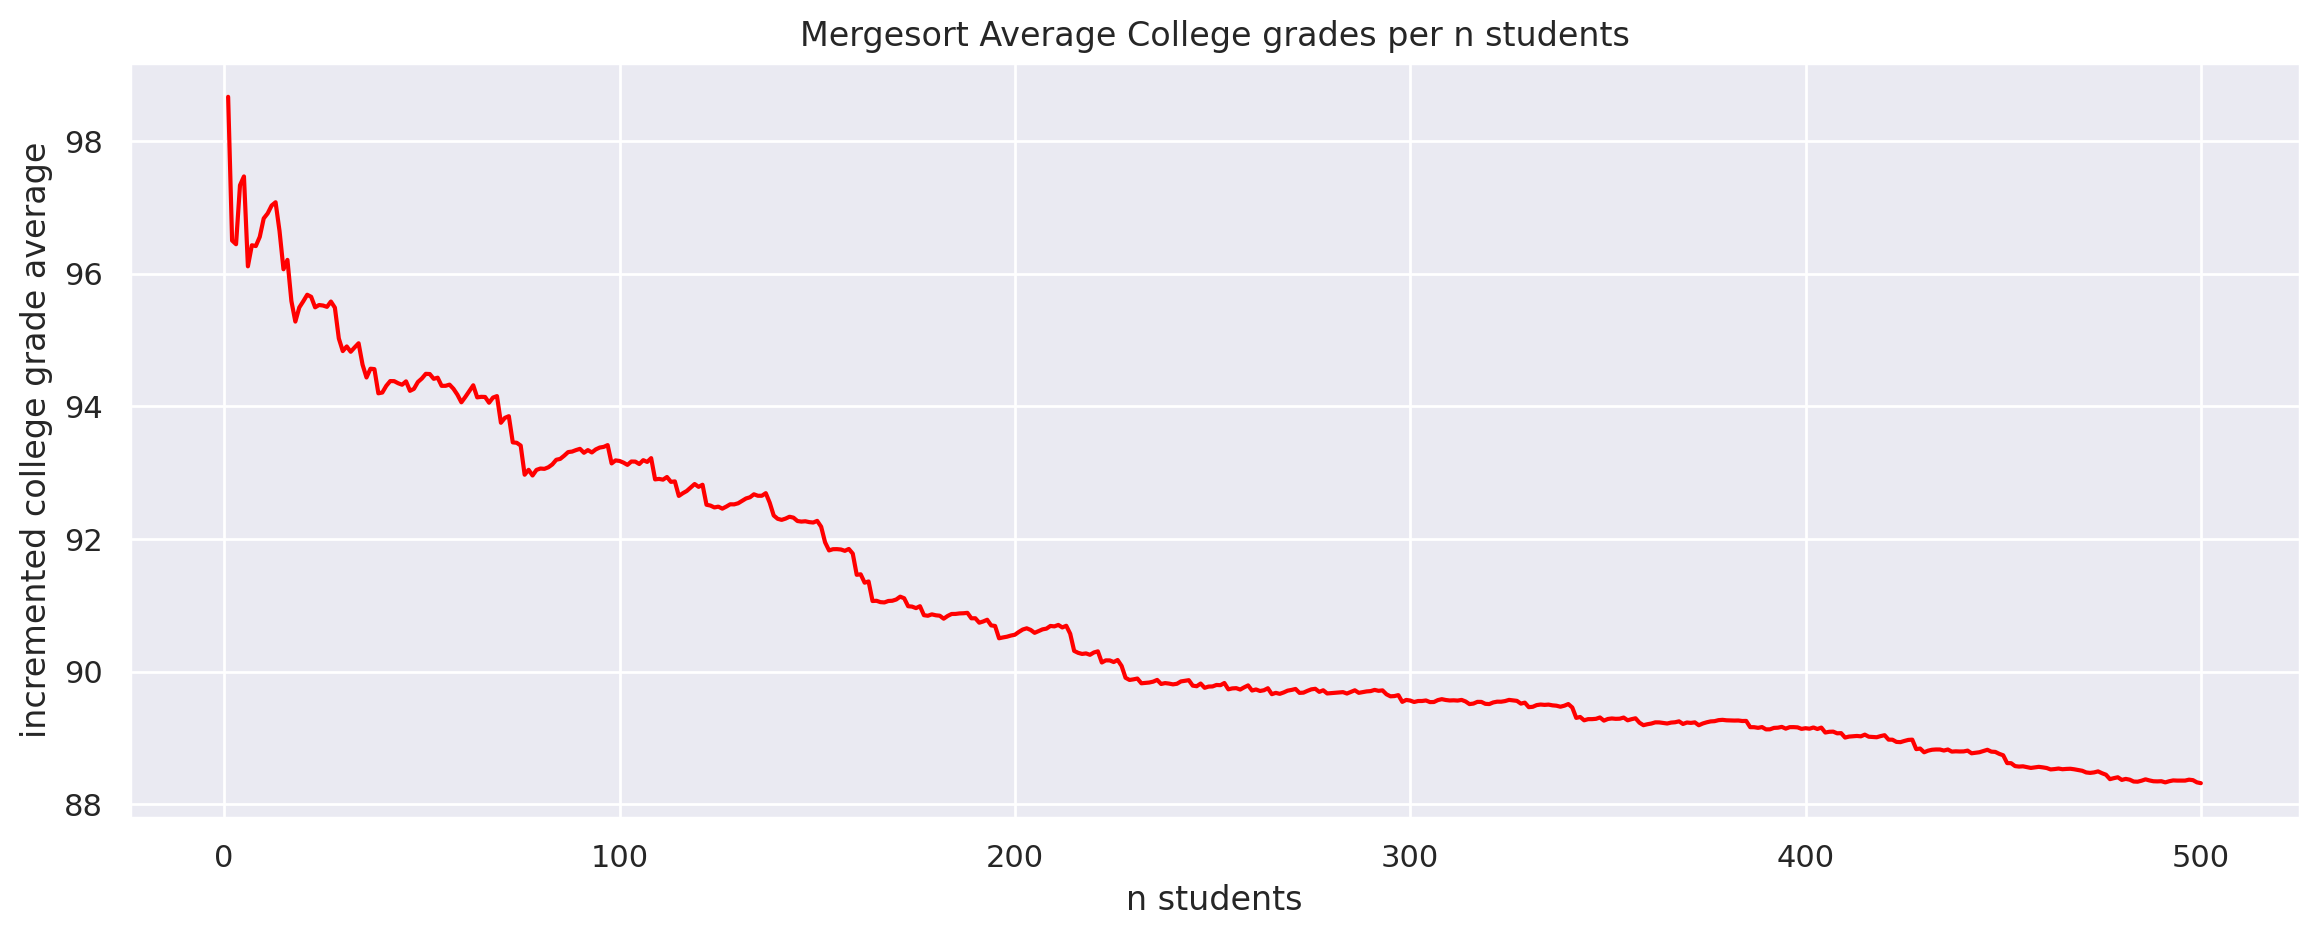

In [21]:
# Look of single lineplot of mergesort grades as function of n
# sns.lineplot(x="n_students", y="incr_hi_mean", data=df_avg, color="red").set_title("Mergesort Average HI grades per n students")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color="red").set_title("Mergesort Average College grades per n students")

plt.xlabel('n students')
plt.ylabel('incremented college grade average')
plt.show()

### Gendersort as function of n

In [22]:


# The gendersort as function of n
#set the incremented col avg as column
gender_df["incr_col_mean"] = gender_df.COL_GRADE_AVG.expanding().mean()

#evt.:
#check the incremented average grades
#gender_df["incr_hi_mean"] #index "2" er average af 100+97/2


#cumsum of index to use for plot
gender_df["n_students"] = range(1,len(gender_df)+1)

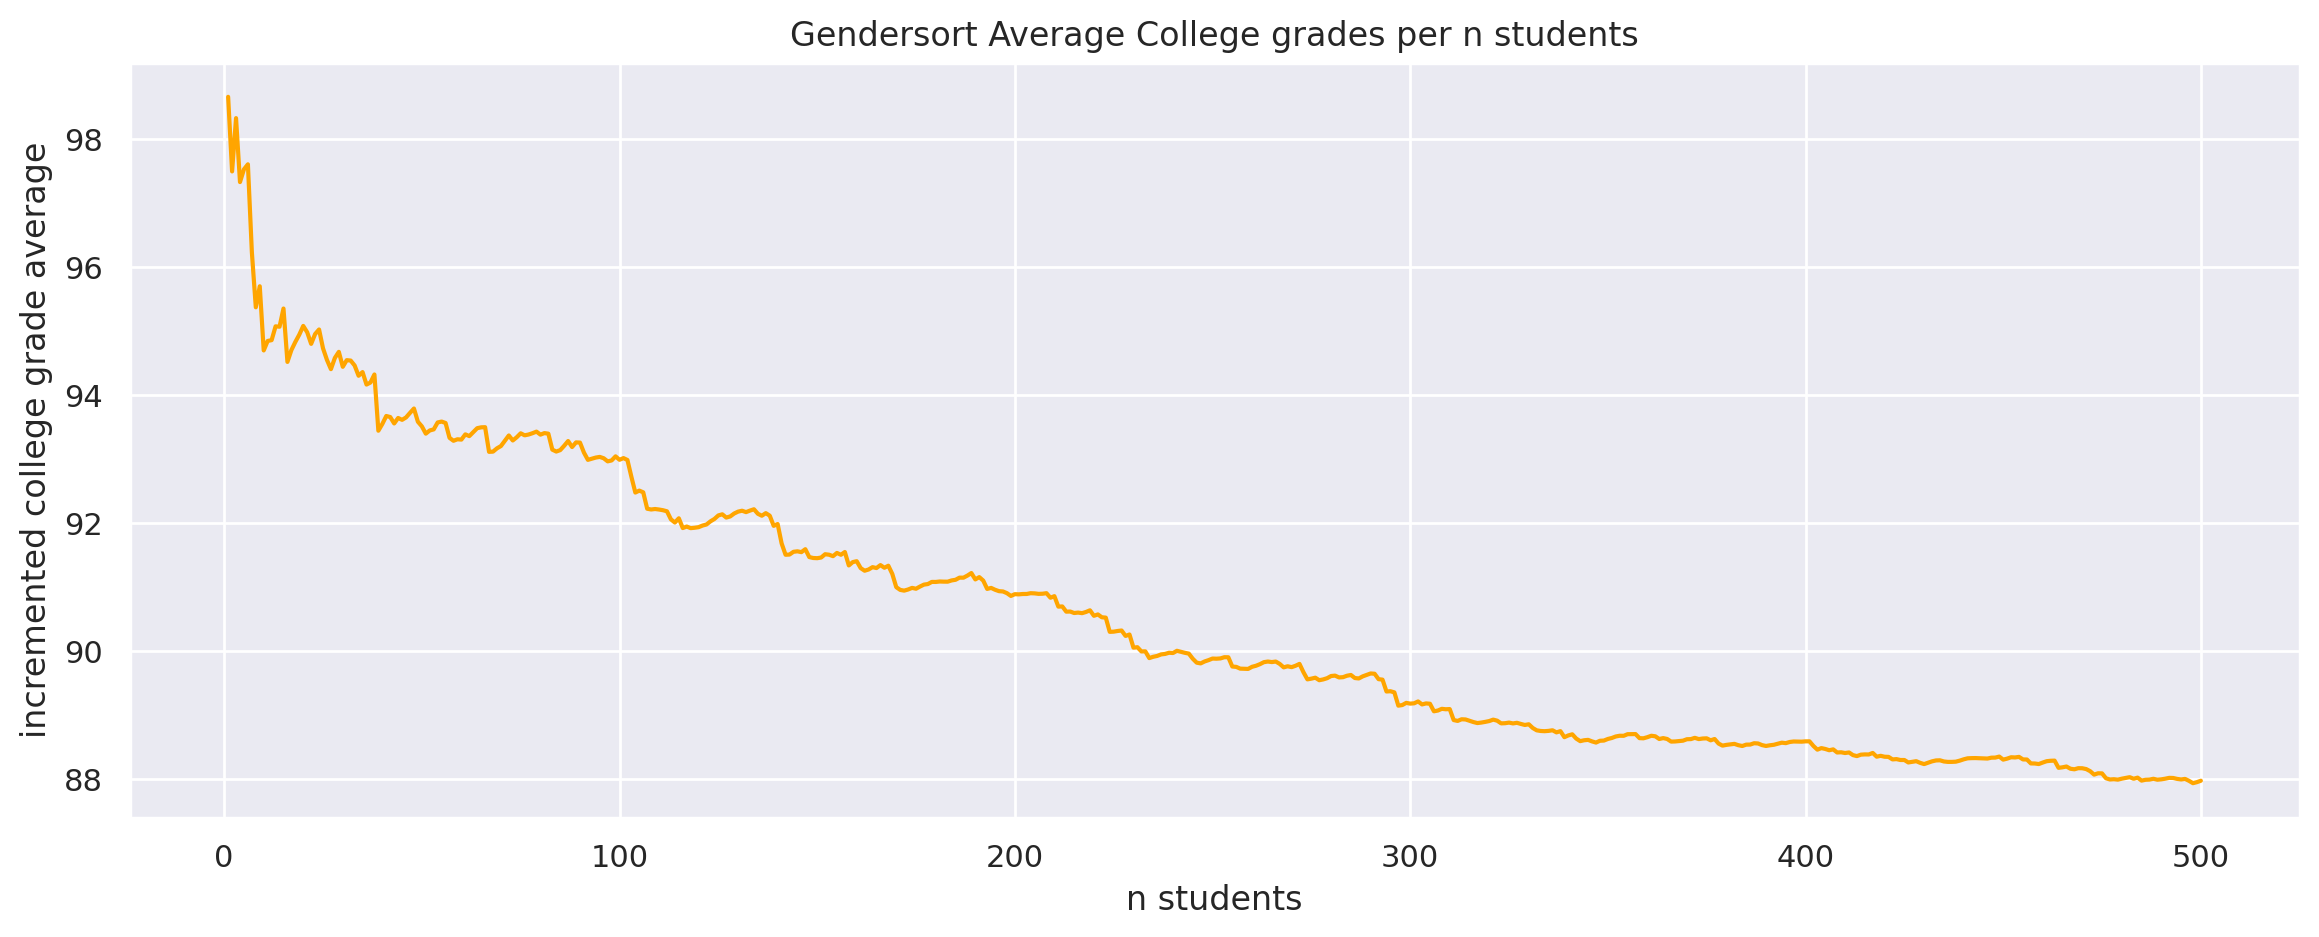

In [23]:
# Look of single lineplot of gendersort grades as function of n
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color="orange").set_title("Gendersort Average College grades per n students")
plt.xlabel('n students')
plt.ylabel('incremented college grade average')
plt.show()

### Random sort as function of n
2000 samples of random dataframes are generated and plotted with std. as error bars

In [24]:
#Random generated dfs
pd.options.mode.chained_assignment = None 

df_use = df.copy()
df_use = df_use[["Unnamed: 0","COL_GRADE_AVG", "GENDER_bin"]] #"STRATUM"

for j in range(1,2): #first make one random df that we can append the other random dfs to
    gen_state = random.seed(a=None) #random generator
    df_random1 = shuffle(df_use, random_state=gen_state) #shuffle the df with a random generator based on time
    df_random1["incr_col_mean"] = df_random1.COL_GRADE_AVG.expanding().mean()
    df_random1["n_students"] = range(1,len(df_random1)+1)
    for i in range(1000):
        gen_state = random.seed(a=None)
        df_random2 = shuffle(df_use, random_state=gen_state)
        df_random2["incr_col_mean"] = df_random2.COL_GRADE_AVG.expanding().mean()
        df_random2["n_students"] = range(1,len(df_random2)+1)
        df_random1 = df_random1.append(df_random2)

In [25]:
df_random1

,Unnamed: 0,COL_GRADE_AVG,GENDER_bin,incr_col_mean,n_students
461,3379,97.333333,1,97.333333,1
1799,5477,65.000000,0,81.166667,2
1640,3755,41.666667,0,68.000000,3
3165,12345,89.333333,1,73.333333,4
3000,4476,29.666667,1,64.600000,5
...,...,...,...,...,...
1093,8711,64.333333,0,63.026067,4092
3656,2313,88.666667,0,63.032332,4093
1817,11986,99.333333,0,63.041199,4094
619,8228,62.000000,0,63.040944,4095


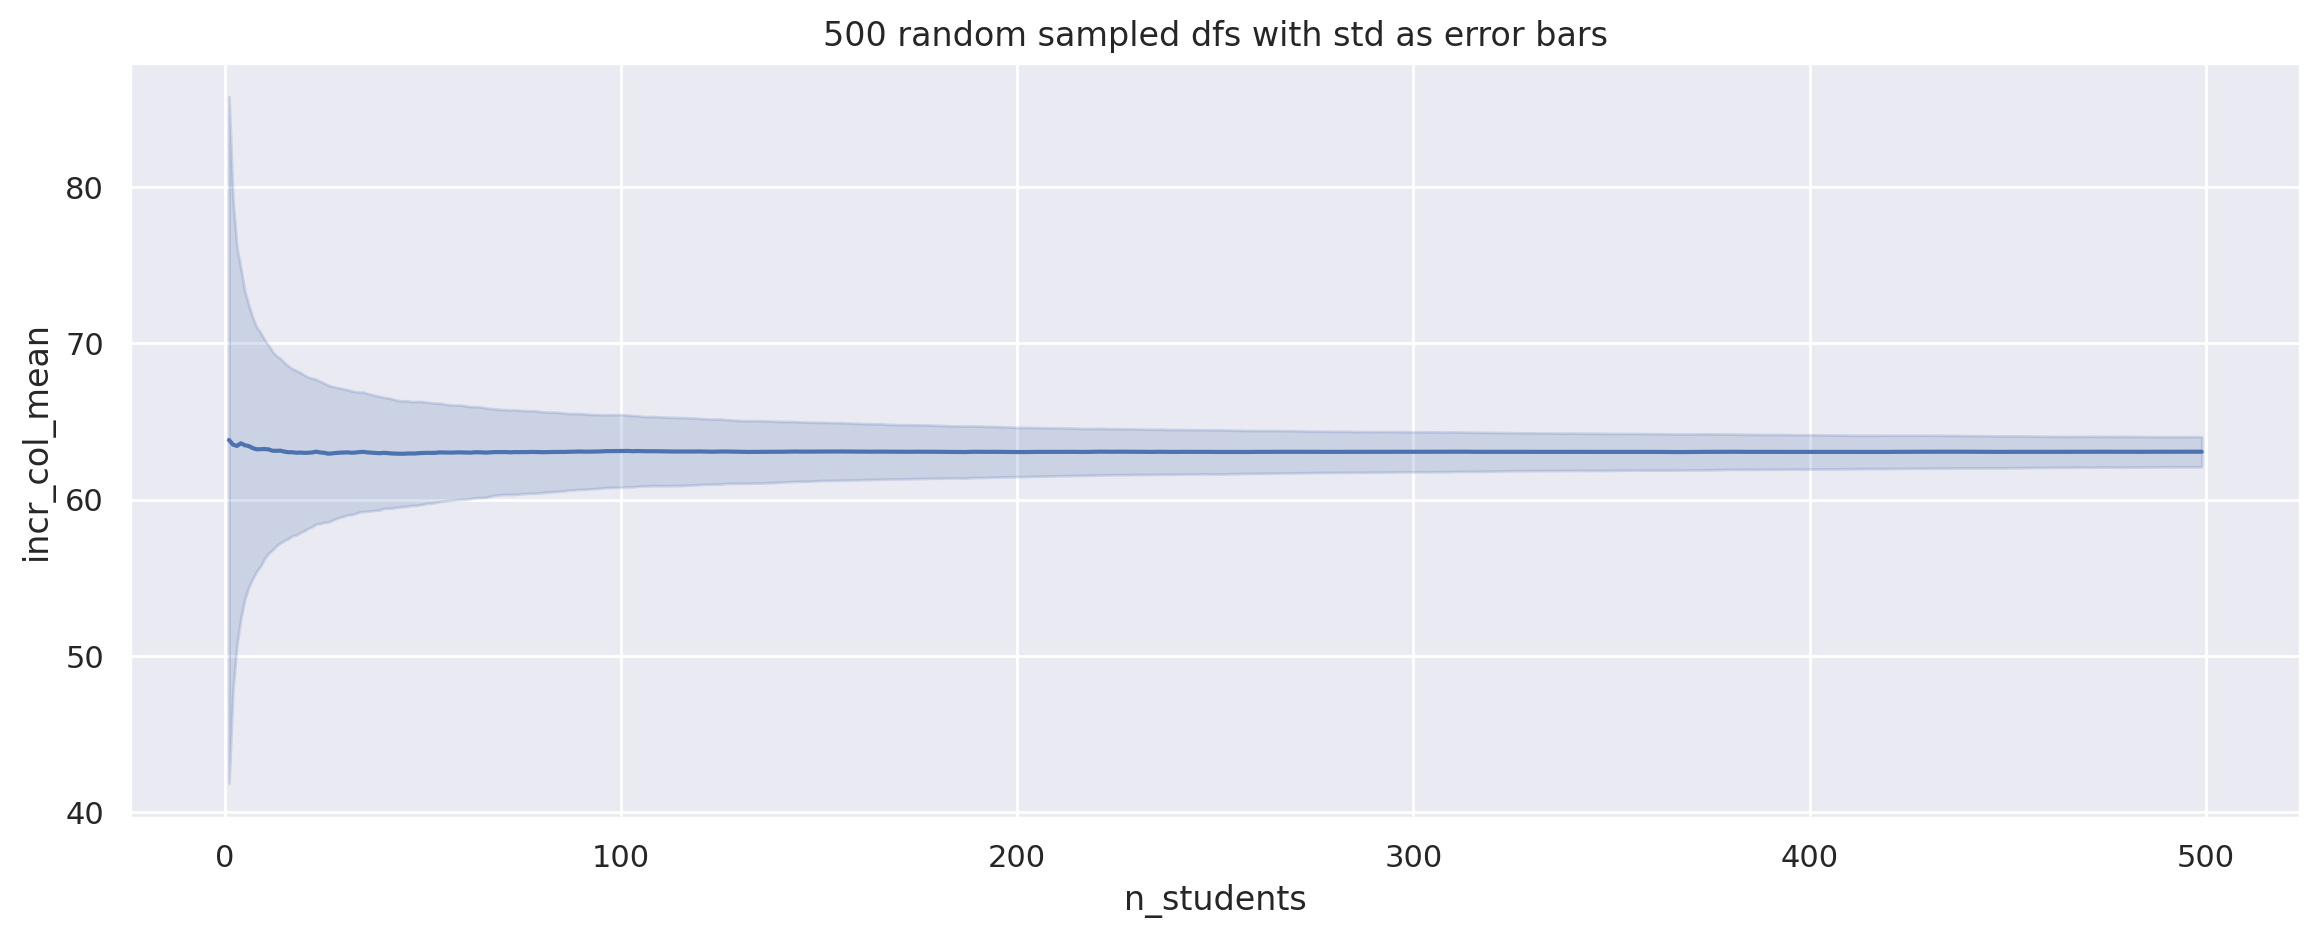

In [36]:
#First we plot the random grades per n students
# w 2000 samples
#indexs = np.arange(0,500)
#df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]

#only take n students from index 1-500
indexs = np.arange(0,500)
df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
df_random_use = df_random_use.reset_index()

sns.lineplot(data=df_random_use, x="n_students", y="incr_col_mean", ci="sd")
plt.title("500 random sampled dfs with std as error bars")#.set_xlim(left=0, right=500)
plt.show()

### Random sort together with mergesort and gendersort as function of n

In [37]:
indexs = np.arange(0,500)
df_random_use_plot = df_random_use.loc[df_random_use['n_students'].isin(indexs)]
#df_random_use_plot = df_random_use.reset_index()

df_random_use_plot = df_random_use_plot


In [38]:

df_random_use_plot

,index,Unnamed: 0,COL_GRADE_AVG,GENDER_bin,incr_col_mean,n_students
0,461,3379,97.333333,1,97.333333,1
1,1799,5477,65.000000,0,81.166667,2
2,1640,3755,41.666667,0,68.000000,3
3,3165,12345,89.333333,1,73.333333,4
4,3000,4476,29.666667,1,64.600000,5
...,...,...,...,...,...,...
499494,288,2112,31.000000,0,63.000000,495
499495,2484,9793,45.000000,0,62.963710,496
499496,2666,886,66.000000,0,62.969819,497
499497,3482,3809,87.666667,1,63.019411,498


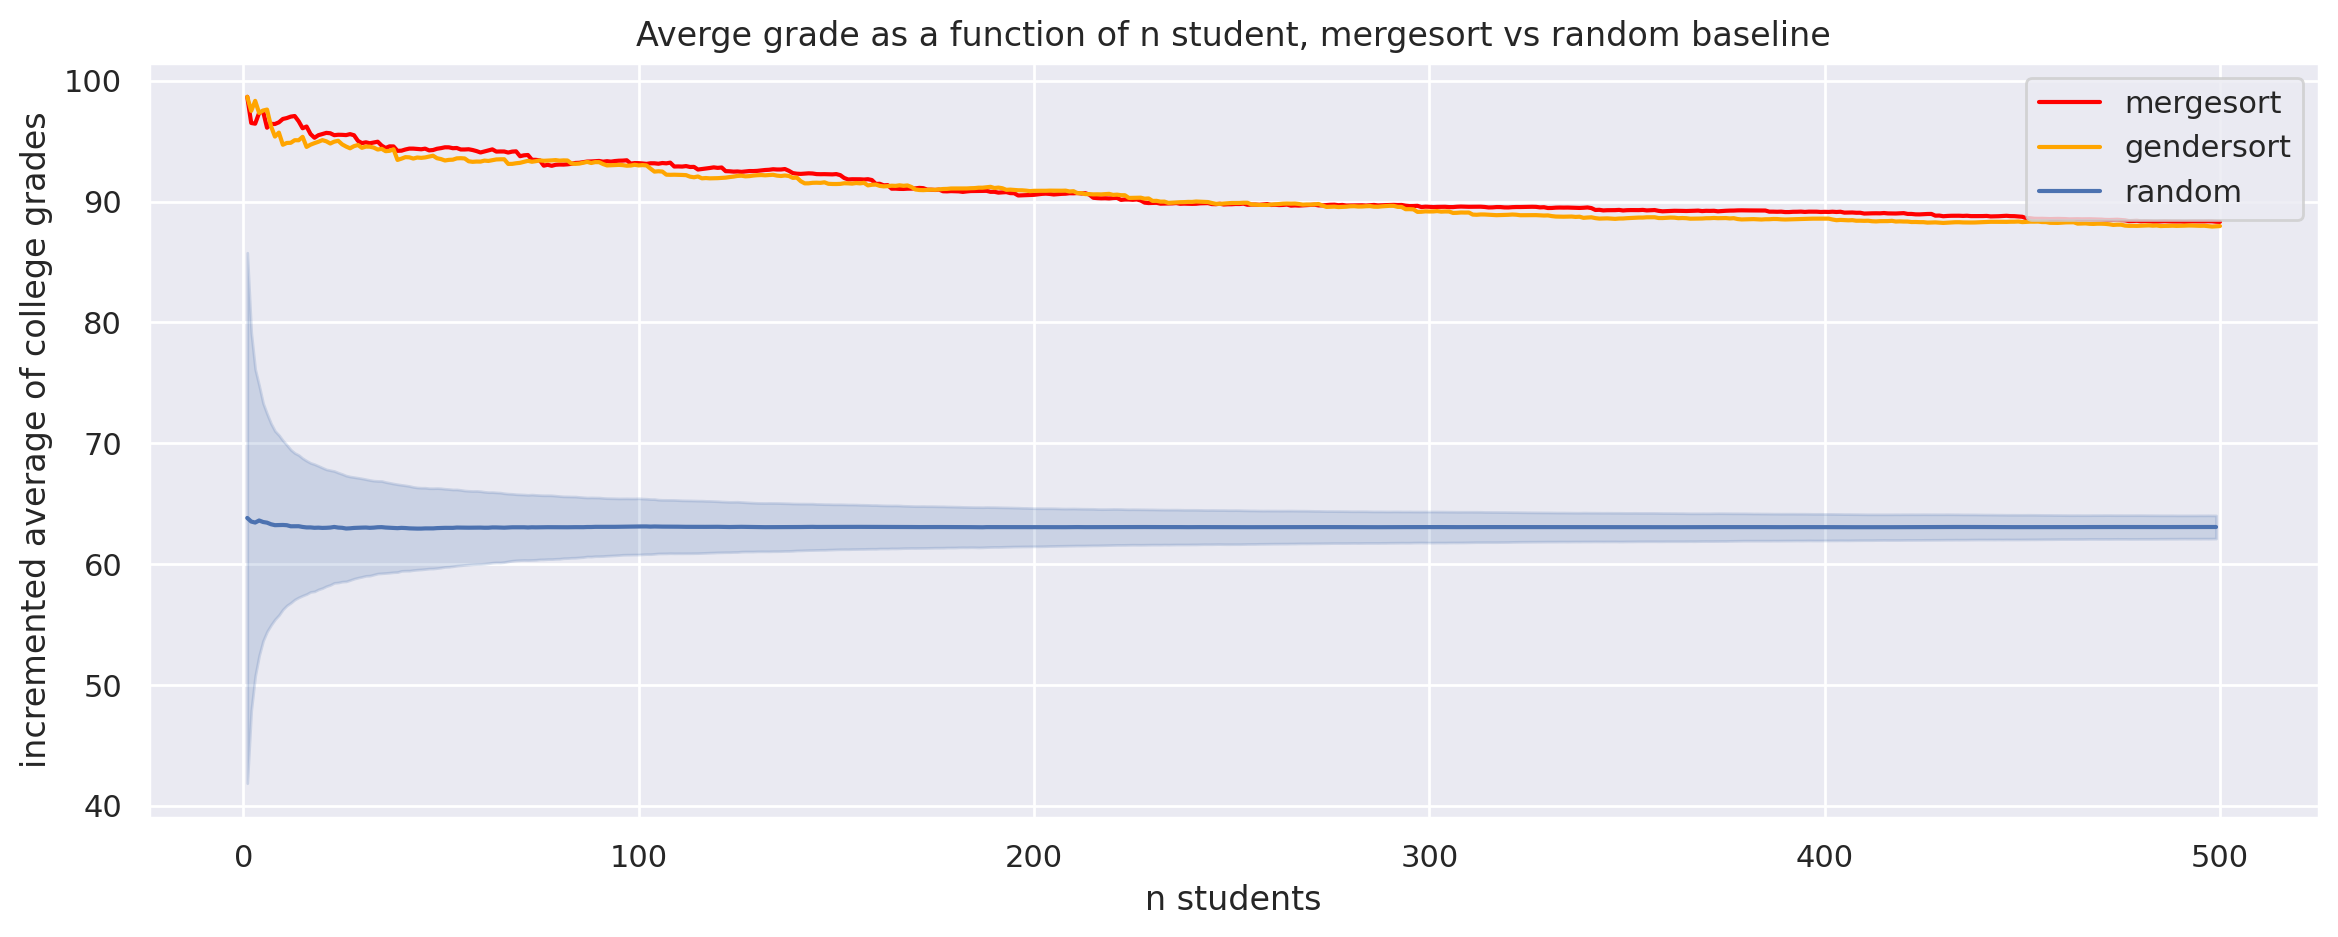

In [39]:
# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(data=df_random_use_plot, x="n_students", y="incr_col_mean", ci="sd")
plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, mergesort vs random baseline")
plt.legend(["mergesort", "gendersort", "random"], loc ="upper right")
plt.show()

## Baselines and XGBoost average COL scores as function of n. 

Using "preds" as College scores for XGBoost

In [30]:
# XGBOOST with senesitive attributes 
df_xgb_vanilla = pd.read_csv("samlet_preds_plain_ex.csv")
df_xgb_vanilla = df_xgb_vanilla.rename(columns={"Gender_bins":"GENDER_bin"}) 

# XGBOOST without senesitive attributes 
df_xgb_wo = pd.read_csv("samlet_preds_index_without_sensitive_ny.csv")
df_xgb_wo = df_xgb_wo.merge(df_xgb_vanilla[["GENDER_bin", "Idx"]], on="Idx")

In [40]:
## The preds as function of n


#Vanilla 

#set the incremented col avg as column
df_xgb_vanilla["incr_col_mean"] = df_xgb_vanilla.Preds.expanding().mean()

#cumsum of index to use for plot
df_xgb_vanilla["n_students"] = range(1,len(df_xgb_vanilla)+1)

#Without


#set the incremented col avg as column
df_xgb_wo["incr_col_mean"] = df_xgb_wo.Preds.expanding().mean()

#cumsum of index to use for plot
df_xgb_wo["n_students"] = range(1,len(df_xgb_wo)+1)



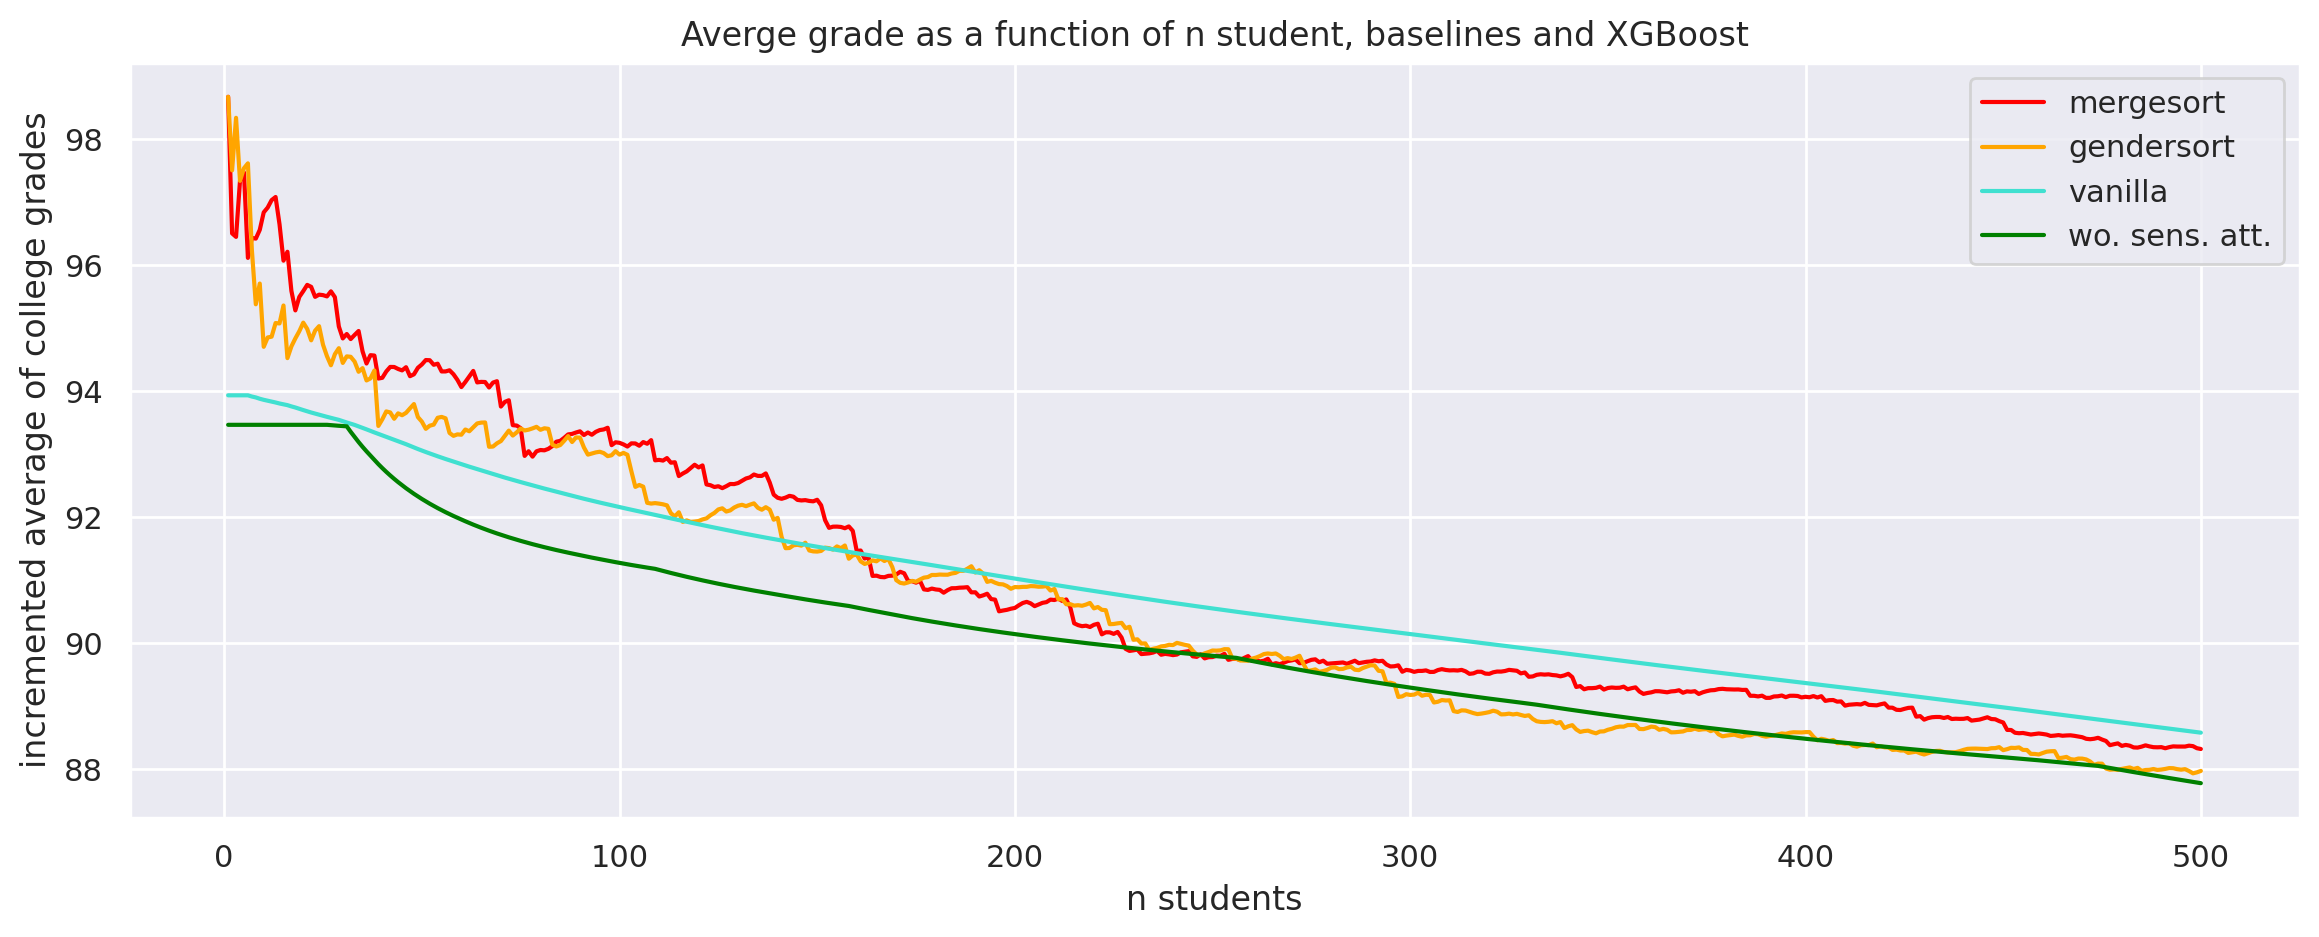

In [44]:
# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
# sns.lineplot(data=df_random1[:500], x="n_students", y="incr_col_mean", ci="sd")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_wo[:500], color ="green")

plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.legend(["mergesort", "gendersort", "vanilla", "wo. sens. att."], loc ="upper right")
plt.show()

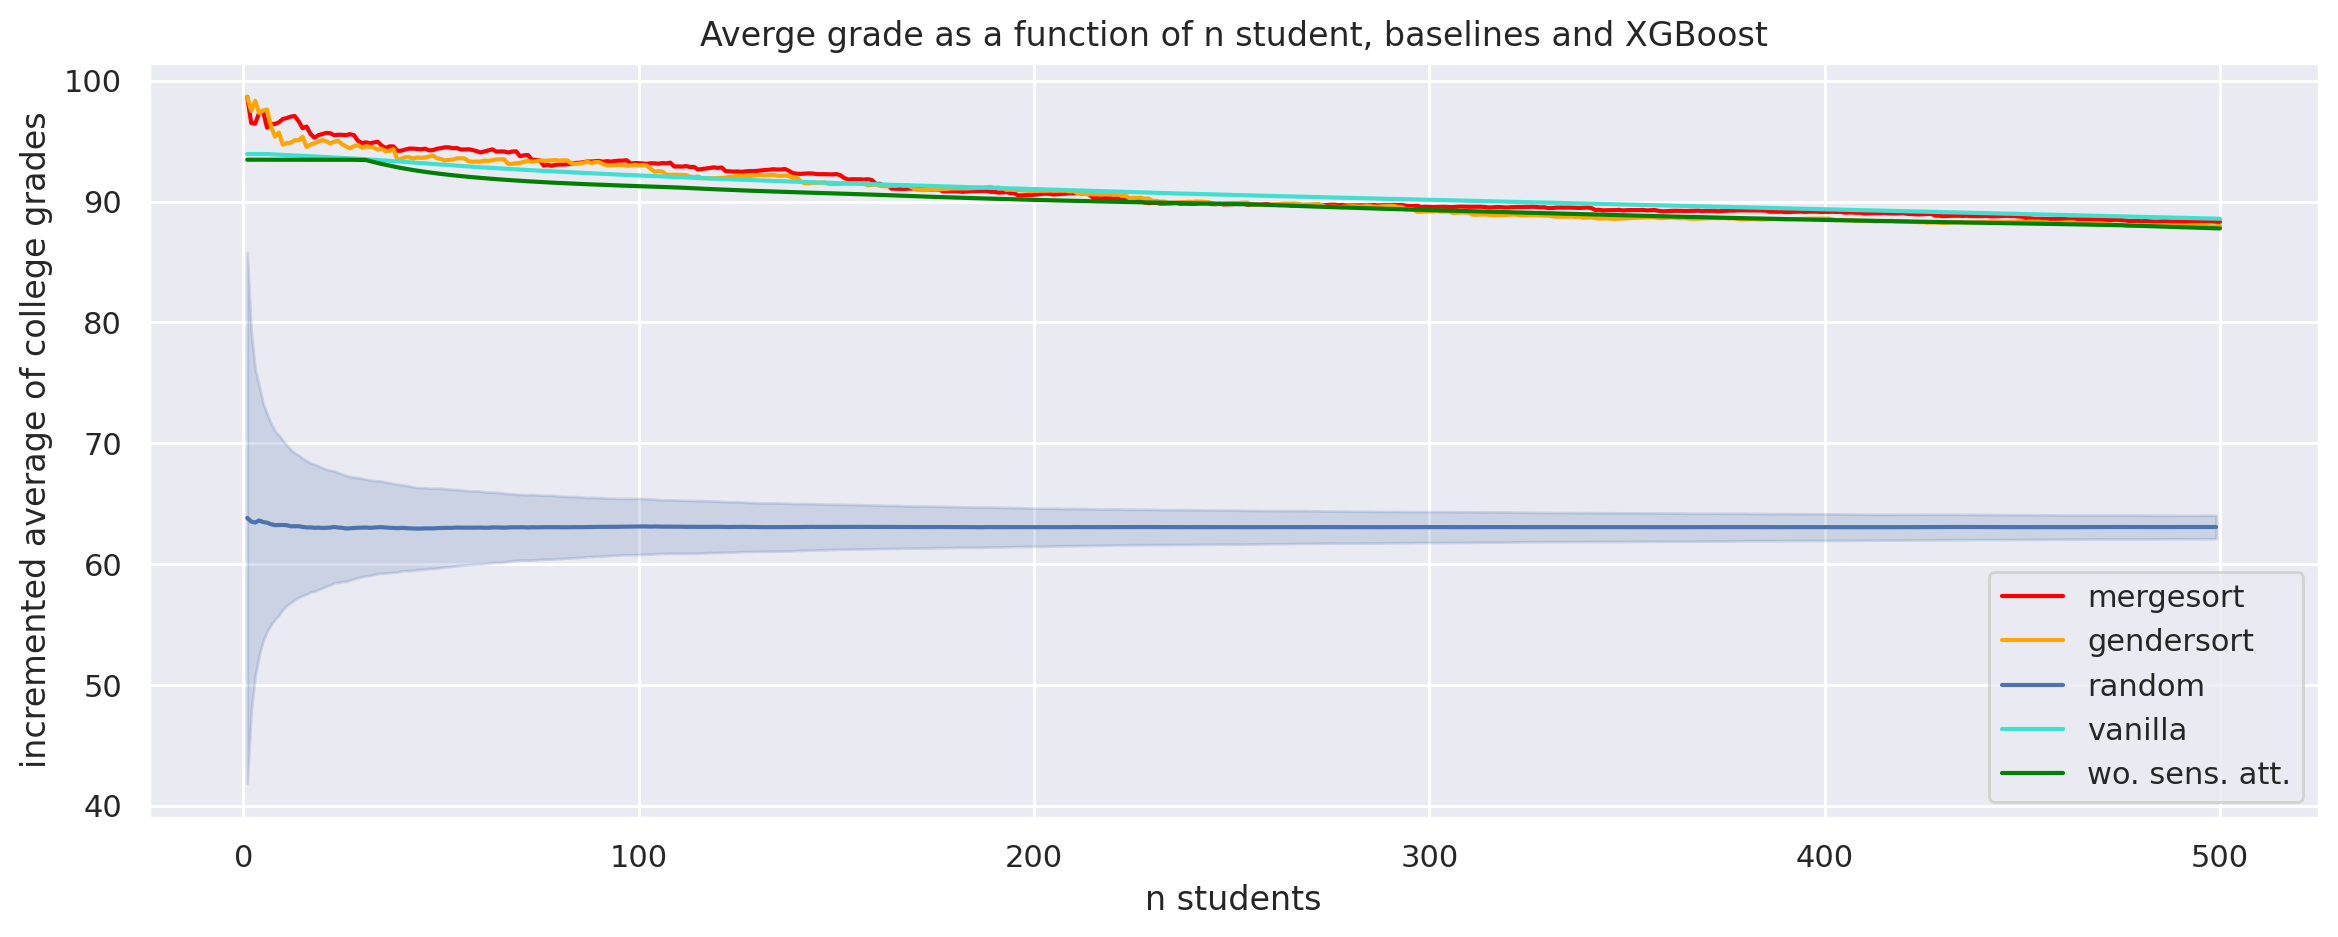

In [42]:
# The random grades per n students together with the gendersorted mergesort grades per n students

sns.lineplot(x="n_students", y="incr_col_mean", data=df_avg[:500], color='red')
sns.lineplot(x="n_students", y="incr_col_mean", data=gender_df[:500], color ='orange')
sns.lineplot(data=df_random_use_plot, x="n_students", y="incr_col_mean", ci="sd")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_vanilla[:500], color="turquoise")
sns.lineplot(x="n_students", y="incr_col_mean", data=df_xgb_wo[:500], color ="green")

plt.xlabel('n students')
plt.ylabel('incremented average of college grades')
plt.title("Averge grade as a function of n student, baselines and XGBoost")
plt.legend(["mergesort", "gendersort", "random", "vanilla", "wo. sens. att."], loc ="lower right")
plt.show()

## Entropy as a function of *n* for the different baselines
Using the Shannon entropy from https://en.wikipedia.org/wiki/Diversity_index:
$H^{\prime}=-\sum_{i=1}^{R} p_{i} \ln p_{i}$.

### Entropy of gender 

In this case *i* = {M, F}. I.e. $p_{i}$ is the ratio of either M or F in the given sample.
Log base 2 is used, as M and F are binary input, also described in (https://en.wikipedia.org/wiki/Diversity_index).


Afterwards entropy of gender-stratum pair is computed.

**Gender entropy in mergesorted df**

In [124]:
# Reset index of merge sort
df_sort = df_sort.reset_index()

In [125]:
#For each row incremented, get ratio of M and F
data_value_counts_gen = []
for i in range(1,len(df_sort)+1):
    data_value_counts_gen.append(np.array([df_sort["GENDER_bin"][:i].value_counts(normalize=True)]))

In [126]:
#Create new column with the ratios
df_sort["value_counts_col_GENDER"] = data_value_counts_gen

In [127]:
# Check if probabilities look correct
df_sort[["value_counts_col_GENDER", "GENDER_bin"]][:5] 

,value_counts_col_GENDER,GENDER_bin
0,[[1.0]],1
1,[[1.0]],1
2,"[[0.6666666666666666, 0.3333333333333333]]",0
3,"[[0.5, 0.5]]",0
4,"[[0.6, 0.4]]",0


In [128]:
#For each row incremented, get entropy 
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col_GENDER"][i]*np.log2(df_sort["value_counts_col_GENDER"][i])).sum())

In [129]:
#Create new column with the entropy
df_sort["entropy_col_GENDER"] = data_entropy

In [130]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log2(0.5)))
df_sort[["GENDER_bin", "value_counts_col_GENDER", "entropy_col_GENDER"]]

1.0


,GENDER_bin,value_counts_col_GENDER,entropy_col_GENDER
0,1,[[1.0]],-0.000000
1,1,[[1.0]],-0.000000
2,0,"[[0.6666666666666666, 0.3333333333333333]]",0.918296
3,0,"[[0.5, 0.5]]",1.000000
4,0,"[[0.6, 0.4]]",0.970951
...,...,...,...
4091,0,"[[0.591642228739003, 0.4083577712609971]]",0.975630
4092,0,"[[0.5917419985340826, 0.4082580014659174]]",0.975577
4093,1,"[[0.5915974596971177, 0.40840254030288226]]",0.975654
4094,0,"[[0.5916971916971917, 0.4083028083028083]]",0.975601


**Gender entropy in gendersorted df**

In [131]:
#Value counts/ratio per row

data_value_counts_GENDER = []
for i in range(1,len(gender_df)+1):
    data_value_counts_GENDER.append(np.array([gender_df["GENDER_bin"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col_GENDER"] = data_value_counts_GENDER

#Entropy for each row

data_entropy_GENDER = []
for i in range(len(df_sort)):
    data_entropy_GENDER.append(-(gender_df["value_counts_col_GENDER"][i]*np.log2(gender_df["value_counts_col_GENDER"][i])).sum())    

gender_df["entropy_col_GENDER"] = data_entropy_GENDER


**Gender entropy of random**

In [132]:
#only take n students from index 1-500
indexs = np.arange(0,500)
df_random_use = df_random1.loc[df_random1['n_students'].isin(indexs)]
df_random_use = df_random_use.reset_index()

In [133]:
df_random_use.n_students.max()

499

In [134]:
random_value_counts_GENDER = []
i = 0
while i < 999:
    idx = 0
    while idx <= df_random_use.n_students.max():
        random_value_counts_GENDER.append(np.array([df_random_use["GENDER_bin"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1

In [135]:
df_random_use["value_counts_col_GENDER"] = random_value_counts_GENDER[1:]

In [136]:
#Entropy for each row

random_entropy_GENDER = []
for i in df_random_use.index:
    random_entropy_GENDER.append(-(df_random_use["value_counts_col_GENDER"][i]*np.log2(df_random_use["value_counts_col_GENDER"][i])).sum())    

df_random_use["entropy_col_GENDER"] = random_entropy_GENDER

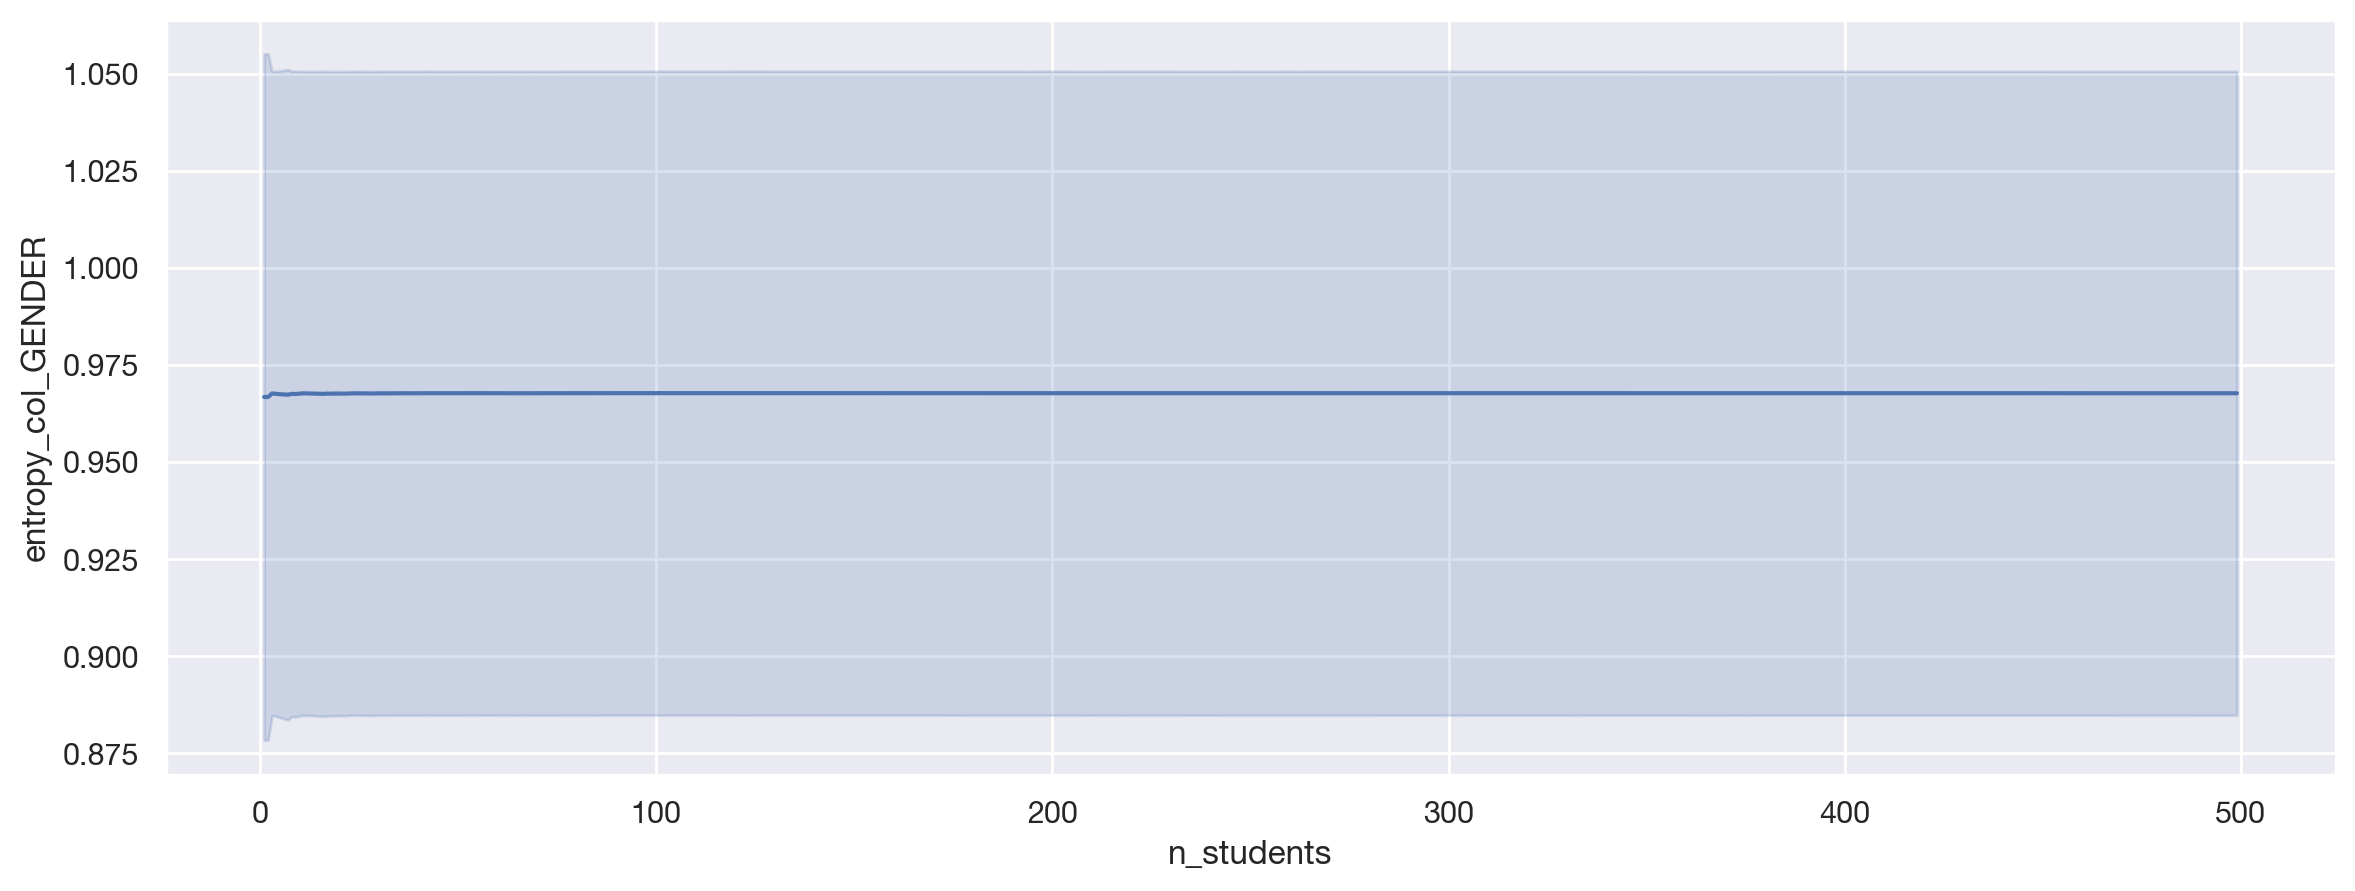

In [137]:
# randomsort entropy of gender
sns.lineplot(data=df_random_use, x="n_students", y="entropy_col_GENDER", ci="sd")
plt.show()

NOT run

In [117]:
#df_random1 = df_random1.reset_index()
random_value_counts_GENDER = []
i = 0
while i < 999:
    idx = 0
    while idx <= df_random1.n_students.max():
        random_value_counts_GENDER.append(np.array([df_random1["GENDER_bin"][:idx].value_counts(normalize=True)]))
        idx = idx+1 
    i = i+1

KeyboardInterrupt: 

In [ ]:
df_random1["value_counts_col_GENDER"] = random_value_counts_GENDER[1:]

In [ ]:
#Entropy for each row

random_entropy_GENDER = []
for i in df_random1.index:
    random_entropy_GENDER.append(-(df_random1["value_counts_col_GENDER"][i]*np.log2(df_random1["value_counts_col_GENDER"][i])).sum())    

df_random1["entropy_col_GENDER"] = random_entropy_GENDER

In [ ]:
# randomsort entropy of gender
sns.lineplot(data=df_random1, x="n_students", y="entropy_col_GENDER", ci="sd")
plt.show()

### Plot of gender entropy of mergesorted and gendersorted df and random

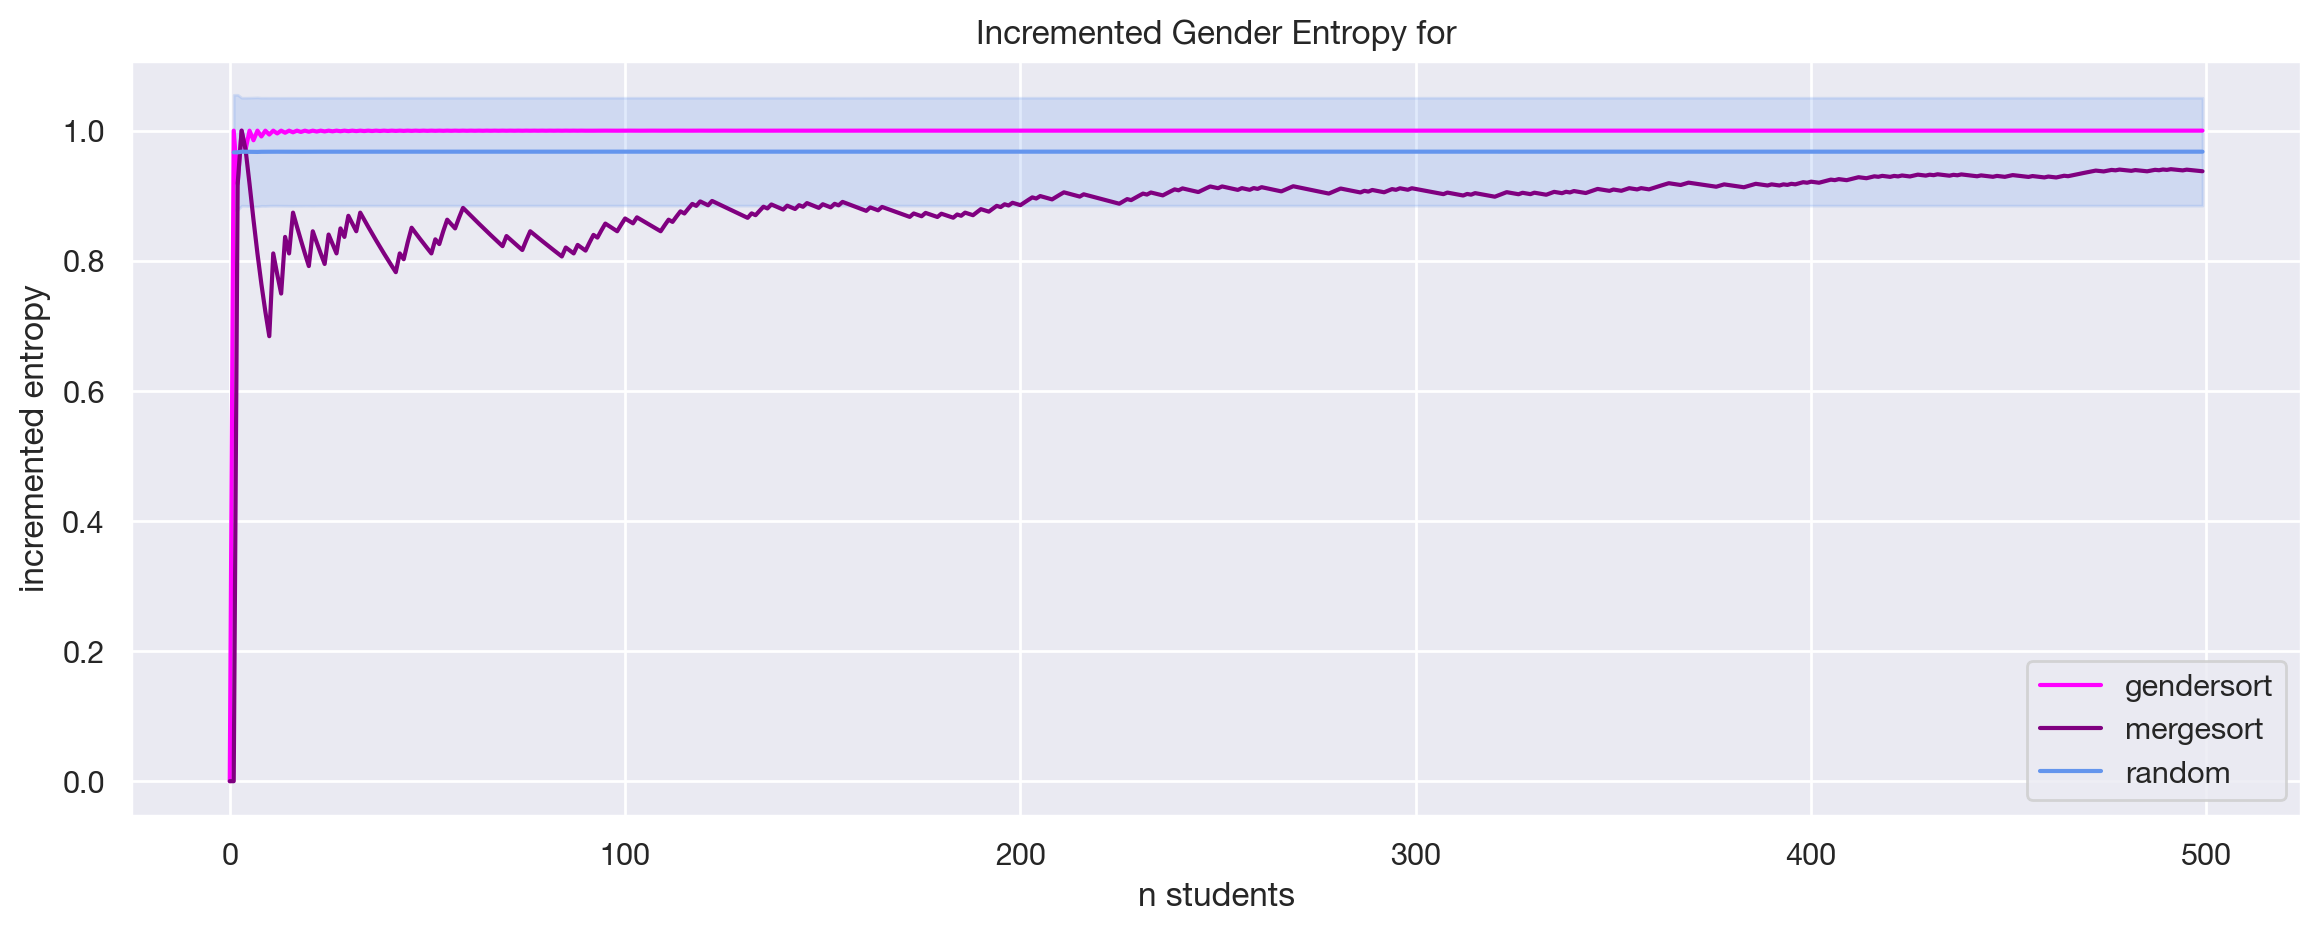

In [212]:
#ENTROPY GENDER gender_sort and merge_sort and random

# list of colors: https://matplotlib.org/stable/gallery/color/named_colors.html

df_sort["n_students"] = range(len(df_sort))

sns.color_palette("deep")

# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=gender_df[:500], color="magenta")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_sort[:500], color="purple")

# randomsort entropy of gender
sns.lineplot(data=df_random_use, x="n_students", y="entropy_col_GENDER", ci="sd", color="cornflowerblue")

## XGBOOST

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))


plt.title("Incremented Gender Entropy for")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["gendersort", "mergesort", "random"], loc ="lower right")



plt.show()

### Entropy of gender-startum pairs
In this case *i* = {1_0, 1_1, 2_0, 2_1, ... , 6_0, 6_1}. We call each entry for a sg-par. E.g. 1_0 represents Stratum 1, Gender F = 0. 6_1 represents Stratum 6, Gender M = 1. 
I.e. $p_{i}$ is the ratio of each sg-pair in the given sample. The entropy is the summation over the number of sg-pair present in the sample. 
Log base e (natural) is used, as each entry is a natural number. 


**Gender-stratum entropy in mergesorted df**

In [171]:
df_sort

,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG,value_counts_col_GENDER,entropy_col_GENDER,n_students
0,1929,5129,100.000000,1,0,0,0,0,1,0,0,Stratum_4,98.666667,[[1.0]],-0.000000,0
1,1476,5673,94.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333,[[1.0]],-0.000000,1
2,3126,4900,93.666667,0,0,0,1,0,0,0,0,Stratum_2,96.333333,"[[0.6666666666666666, 0.3333333333333333]]",0.918296,2
3,2155,12328,93.333333,0,0,0,0,1,0,0,0,Stratum_3,100.000000,"[[0.5, 0.5]]",1.000000,3
4,3928,2607,93.333333,0,0,0,0,1,0,0,0,Stratum_3,98.000000,"[[0.6, 0.4]]",0.970951,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,3531,1909,36.333333,0,0,1,0,0,0,0,0,Stratum_1,7.000000,"[[0.591642228739003, 0.4083577712609971]]",0.975630,4091
4092,3720,7166,36.333333,0,0,0,1,0,0,0,0,Stratum_2,12.666667,"[[0.5917419985340826, 0.4082580014659174]]",0.975577,4092
4093,61,3061,35.333333,1,0,0,1,0,0,0,0,Stratum_2,6.333333,"[[0.5915974596971177, 0.40840254030288226]]",0.975654,4093
4094,4004,6366,35.333333,0,0,1,0,0,0,0,0,Stratum_1,7.333333,"[[0.5916971916971917, 0.4083028083028083]]",0.975601,4094


In [172]:
# Function creating gender-startum pair = sg_pair
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None

#stratum gender pair column
df_sort["sg_pair"] = df_sort.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)

#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(df_sort)+1):
    data_value_counts.append(np.array([df_sort["sg_pair"][:i].value_counts(normalize=True)]))

df_sort["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(df_sort)):
    data_entropy.append(-(df_sort["value_counts_col"][i]*np.log10(df_sort["value_counts_col"][i])).sum())

df_sort["entropy_col"] = data_entropy

In [173]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log10(0.5)))

df_sort[["sg_pair", "value_counts_col", "entropy_col"]]

0.3010299956639812


,sg_pair,value_counts_col,entropy_col
0,4_1,[[1.0]],-0.000000
1,5_1,"[[0.5, 0.5]]",0.301030
2,2_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",0.477121
3,3_0,"[[0.25, 0.25, 0.25, 0.25]]",0.602060
4,3_0,"[[0.4, 0.2, 0.2, 0.2]]",0.578558
...,...,...,...
4091,1_0,"[[0.1966250917094644, 0.18610907312301297, 0.1...",0.955843
4092,2_0,"[[0.19657701711491443, 0.1863080684596577, 0.1...",0.955788
4093,2_1,"[[0.19652896602297726, 0.1862625274993889, 0.1...",0.955769
4094,1_0,"[[0.19648093841642228, 0.18621700879765396, 0....",0.955798


**Gender-stratum entropy in gendersorted df**

In [174]:
gender_df

,level_0,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG,incr_col_mean,n_students,value_counts_col_GENDER,entropy_col_GENDER
0,0,1929,5129,100.000000,1,0,0,0,0,1,0,0,Stratum_4,98.666667,98.666667,1,[[1.0]],-0.000000
1,0,3126,4900,93.666667,0,0,0,1,0,0,0,0,Stratum_2,96.333333,97.500000,2,"[[0.5, 0.5]]",1.000000
2,1,2155,12328,93.333333,0,0,0,0,1,0,0,0,Stratum_3,100.000000,98.333333,3,"[[0.6666666666666666, 0.3333333333333333]]",0.918296
3,1,1476,5673,94.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333,97.333333,4,"[[0.5, 0.5]]",1.000000
4,2,1257,7342,89.000000,1,0,0,0,1,0,0,0,Stratum_3,98.333333,97.533333,5,"[[0.6, 0.4]]",0.970951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,2419,2177,8091,37.000000,0,0,0,0,1,0,0,0,Stratum_3,22.000000,63.094901,4092,"[[0.5913978494623656, 0.40860215053763443]]",0.975761
4092,2420,3531,1909,36.333333,0,0,1,0,0,0,0,0,Stratum_1,7.000000,63.081196,4093,"[[0.591497678964085, 0.408502321035915]]",0.975707
4093,2421,3720,7166,36.333333,0,0,0,1,0,0,0,0,Stratum_2,12.666667,63.068881,4094,"[[0.5915974596971177, 0.40840254030288226]]",0.975654
4094,2422,4004,6366,35.333333,0,0,1,0,0,0,0,0,Stratum_1,7.333333,63.055271,4095,"[[0.5916971916971917, 0.4083028083028083]]",0.975601


In [175]:
# Function creating gender-startum pair = sg_pair
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None

#stratum gender pair column
gender_df["sg_pair"] = gender_df.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)

#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(gender_df)+1):
    data_value_counts.append(np.array([gender_df["sg_pair"][:i].value_counts(normalize=True)]))

gender_df["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(gender_df)):
    data_entropy.append(-(gender_df["value_counts_col"][i]*np.log10(gender_df["value_counts_col"][i])).sum())


gender_df["entropy_col"] = data_entropy

In [176]:
# Check if entropy looks correct
print(-2*np.sum(0.5*np.log10(0.5)))

gender_df[["sg_pair", "value_counts_col", "entropy_col"]]

0.3010299956639812


,sg_pair,value_counts_col,entropy_col
0,4_1,[[1.0]],-0.000000
1,2_0,"[[0.5, 0.5]]",0.301030
2,3_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",0.477121
3,5_1,"[[0.25, 0.25, 0.25, 0.25]]",0.602060
4,3_1,"[[0.2, 0.2, 0.2, 0.2, 0.2]]",0.698970
...,...,...,...
4091,3_0,"[[0.1966250917094644, 0.18610907312301297, 0.1...",0.955794
4092,1_0,"[[0.19657701711491443, 0.1860635696821516, 0.1...",0.955824
4093,2_0,"[[0.19652896602297726, 0.1862625274993889, 0.1...",0.955769
4094,1_0,"[[0.19648093841642228, 0.18621700879765396, 0....",0.955798


### Plot of gender-stratum entropy of mergesorted, gendersorted df and random

In [177]:
np.array(gender_df.loc[gender_df['entropy_col'] == 1.0167876363966637].value_counts_col)

array([array([[0.17669173, 0.15413534, 0.11278195, 0.09962406, 0.09774436,
        0.06954887, 0.06954887, 0.06203008, 0.06015038, 0.04511278,
        0.02631579, 0.02631579]])], dtype=object)

In [178]:
listen = []

for i in np.array(gender_df.loc[gender_df['entropy_col'] == 1.0167876363966637].value_counts_col):
    listen.append(i*np.log10(i))

 

In [179]:
-np.sum(listen)

1.0167876363966637

In [180]:
print(-2*np.sum(0.5*np.log(0.5)))


0.6931471805599453


In [181]:
1/12

0.08333333333333333

In [182]:
listen = []

for i in np.array([1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12,1/12]):
    listen.append(i*np.log(i))

 

In [183]:
-np.sum(listen)

2.484906649788001

In [184]:
np.log2(2)

1.0

In [185]:
gender_df.entropy_col.max()

1.0167876363966637

In [186]:
gender_df[:500]

,level_0,index,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG,incr_col_mean,n_students,value_counts_col_GENDER,entropy_col_GENDER,sg_pair,value_counts_col,entropy_col
0,0,1929,5129,100.000000,1,0,0,0,0,1,0,0,Stratum_4,98.666667,98.666667,1,[[1.0]],-0.000000,4_1,[[1.0]],-0.000000
1,0,3126,4900,93.666667,0,0,0,1,0,0,0,0,Stratum_2,96.333333,97.500000,2,"[[0.5, 0.5]]",1.000000,2_0,"[[0.5, 0.5]]",0.301030
2,1,2155,12328,93.333333,0,0,0,0,1,0,0,0,Stratum_3,100.000000,98.333333,3,"[[0.6666666666666666, 0.3333333333333333]]",0.918296,3_0,"[[0.3333333333333333, 0.3333333333333333, 0.33...",0.477121
3,1,1476,5673,94.000000,1,0,0,0,0,0,1,0,Stratum_5,94.333333,97.333333,4,"[[0.5, 0.5]]",1.000000,5_1,"[[0.25, 0.25, 0.25, 0.25]]",0.602060
4,2,1257,7342,89.000000,1,0,0,0,1,0,0,0,Stratum_3,98.333333,97.533333,5,"[[0.6, 0.4]]",0.970951,3_1,"[[0.2, 0.2, 0.2, 0.2, 0.2]]",0.698970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,247,2086,1425,75.333333,0,0,0,0,0,1,0,0,Stratum_4,92.333333,87.999328,496,"[[0.5, 0.5]]",1.000000,4_0,"[[0.17943548387096775, 0.15524193548387097, 0....",1.011548
496,248,2391,5898,75.333333,0,0,1,0,0,0,0,0,Stratum_1,73.000000,87.969148,497,"[[0.5010060362173038, 0.49899396378269617]]",0.999997,1_0,"[[0.1790744466800805, 0.15492957746478872, 0.1...",1.012803
497,248,2455,7407,71.666667,1,0,0,0,1,0,0,0,Stratum_3,69.666667,87.932396,498,"[[0.5, 0.5]]",1.000000,3_1,"[[0.178714859437751, 0.1566265060240964, 0.116...",1.012391
498,249,3046,4466,71.666667,1,0,0,0,0,0,1,0,Stratum_5,96.000000,87.948564,499,"[[0.501002004008016, 0.49899799599198397]]",0.999997,5_1,"[[0.17835671342685372, 0.156312625250501, 0.11...",1.012765


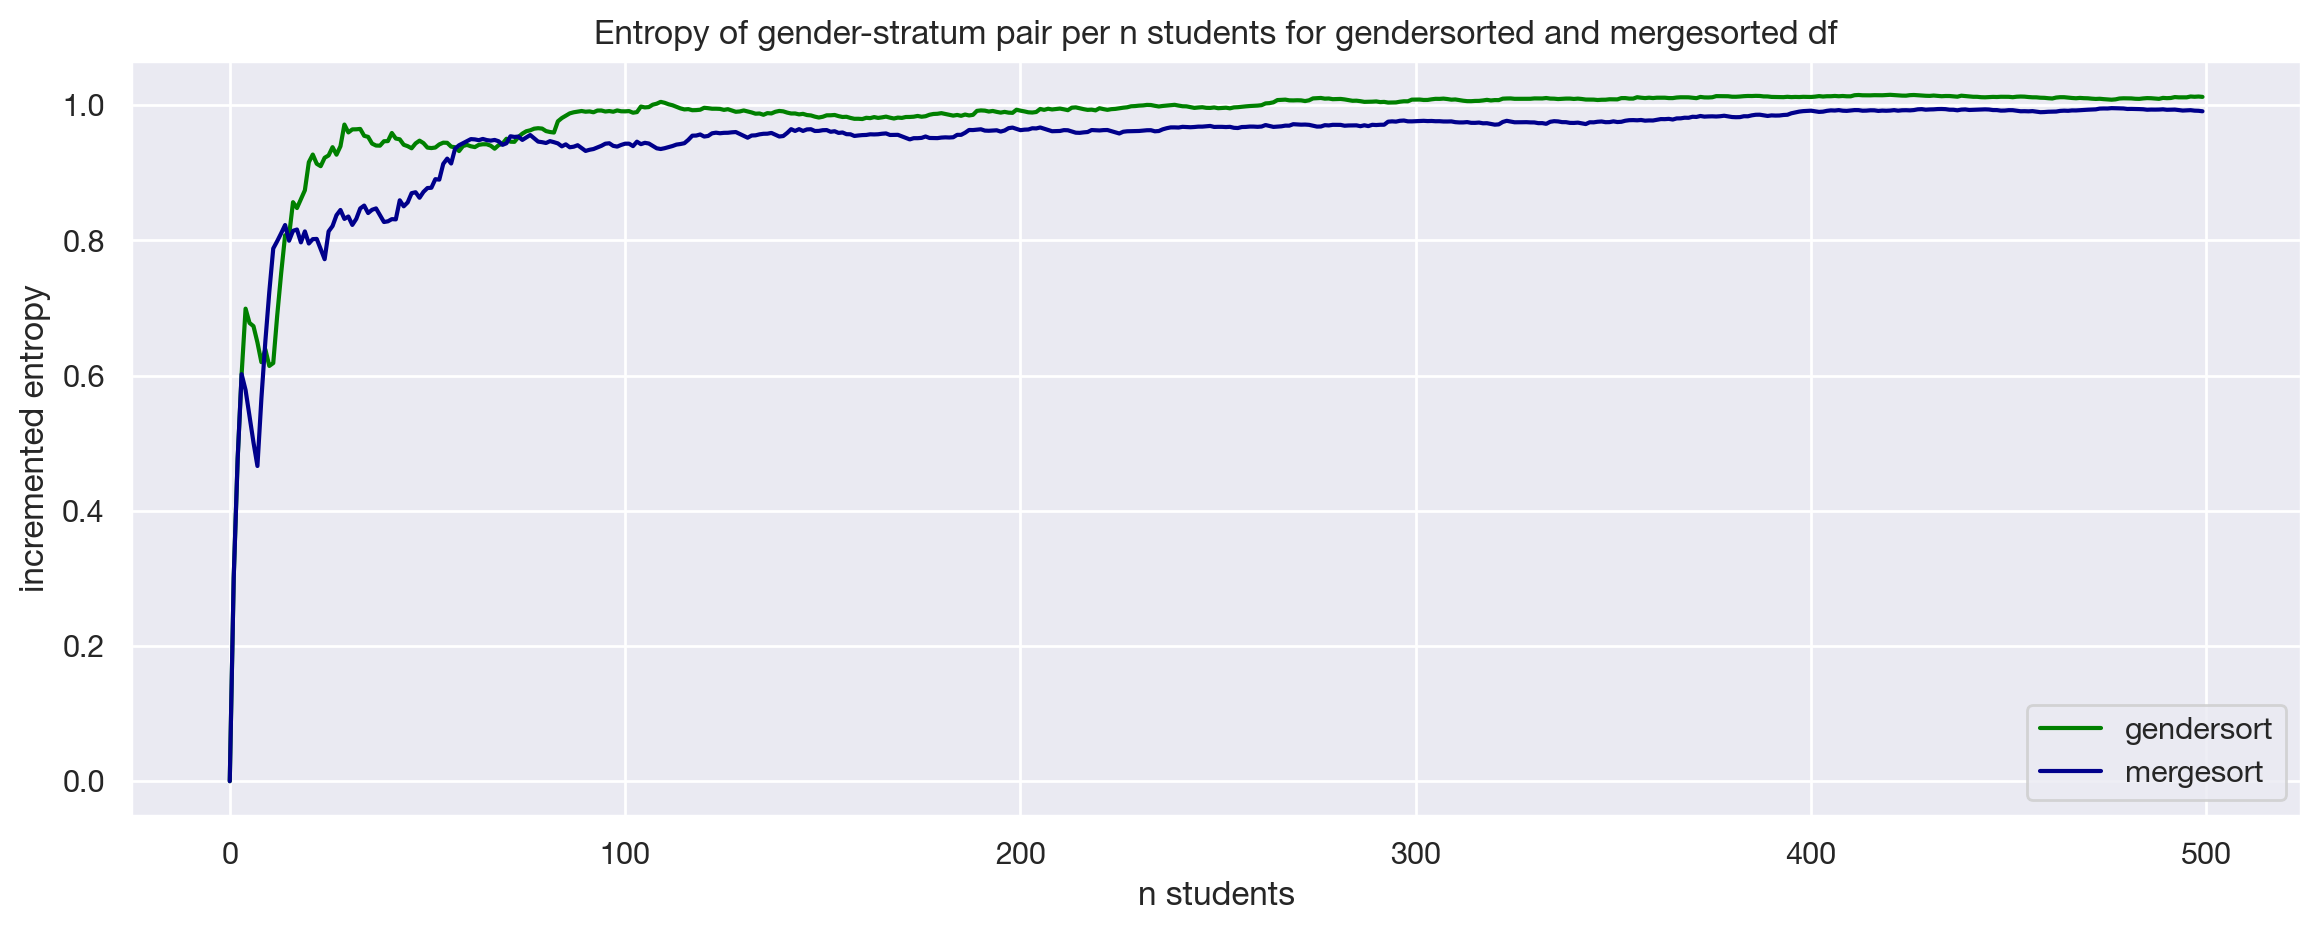

In [187]:
#ENTROPY stratum-gender gender_sort and merge_sort

# Add new column of cumsum+1 to use for x-axis
gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) 


# gendersort entropy of gender-stratum
sns.lineplot(x="n_students", y="entropy_col", data=gender_df[:500], color="green").set_title("Entropy of gender-stratum pair per n students for gendersorted and mergesorted df")

# mergesort entropy of gender-stratum
sns.lineplot(x="n_students", y="entropy_col", data=df_sort[:500], color="darkblue")

plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["gendersort", "mergesort"], loc ="lower right")

plt.show()

# Entropy of xgboost
## - With and without senstitive attributes

### Gender entropy

Import dataframes

In [144]:
df_xgb_vanilla.loc[499]

Unnamed: 0       3243.000000
Idx              2688.000000
GENDER_bin          1.000000
Preds              82.923088
incr_col_mean      87.727504
n_students        500.000000
Name: 499, dtype: float64

In [193]:
df

,Unnamed: 0,HI_GRADE_AVG,GENDER_bin,STRATUM_0,STRATUM_Stratum_1,STRATUM_Stratum_2,STRATUM_Stratum_3,STRATUM_Stratum_4,STRATUM_Stratum_5,STRATUM_Stratum_6,STRATUM,COL_GRADE_AVG,Idx
0,11423,74.333333,1,0,0,0,0,1,0,0,Stratum_4,99.333333,Stratum_4
1,8153,75.000000,0,0,1,0,0,0,0,0,Stratum_1,86.333333,Stratum_1
2,12100,74.666667,0,0,0,0,1,0,0,0,Stratum_3,80.000000,Stratum_3
3,1499,47.666667,0,0,1,0,0,0,0,0,Stratum_1,14.333333,Stratum_1
4,7670,61.666667,0,0,0,0,0,1,0,0,Stratum_4,69.666667,Stratum_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,6782,62.000000,0,0,0,1,0,0,0,0,Stratum_2,80.666667,Stratum_2
4092,2544,48.666667,1,0,0,0,1,0,0,0,Stratum_3,42.000000,Stratum_3
4093,5419,76.000000,1,0,0,0,1,0,0,0,Stratum_3,91.333333,Stratum_3
4094,7810,66.666667,0,0,0,0,1,0,0,0,Stratum_3,84.000000,Stratum_3


In [200]:
df["Idx"][1]

'Stratum_1'

In [201]:
# XGBOOST with senesitive attributes 
df_xgb_vanilla = pd.read_csv("samlet_preds_index_vanilla-kopi.csv")
df_xgb_vanilla = df_xgb_vanilla.rename(columns={"Gender_bins":"GENDER_bin"}) 
df["Idx"] = df["Unnamed: 0"]
df_xgb_vanilla = df_xgb_vanilla.merge(df[["Idx", "STRATUM"]], on="Idx")


In [202]:
# XGBOOST without senesitive attributes 
df_xgb_wo = pd.read_csv("samlet_preds_index_without_sensitive-kopi.csv")
df_xgb_wo = df_xgb_wo.merge(df_xgb_vanilla[["GENDER_bin", "Idx"]], on="Idx")
df_xgb_wo = df_xgb_wo.merge(df[["Idx", "STRATUM"]], on="Idx")

#df_xgb_wo["GENDER_bin"] = X_test.GENDER_bin.to_numpy()
#Gather with Gender_bin 

Compute Gender entropy

In [203]:
df_xgb_vanilla.head(5)

,Unnamed: 0,Idx,GENDER_bin,Preds,STRATUM
0,2808,7126,0,93.661713,Stratum_3
1,3034,7333,0,93.661713,Stratum_3
2,2787,5248,0,93.661713,Stratum_3
3,523,6236,0,93.661713,Stratum_3
4,3660,7493,0,93.661713,Stratum_3


In [204]:
df_xgb_wo[:501]

,Unnamed: 0,Idx,Preds,GENDER_bin,STRATUM
0,3746,7490,93.462349,1,Stratum_5
1,1929,5129,93.462349,1,Stratum_4
2,3126,4900,93.462349,0,Stratum_2
3,1423,8982,93.462349,0,Stratum_3
4,1777,11714,93.462349,0,Stratum_5
...,...,...,...,...,...
496,729,4616,82.782219,0,Stratum_3
497,1460,2732,82.782219,1,Stratum_4
498,2879,3168,82.782219,0,Stratum_3
499,4005,11203,82.636681,0,Stratum_5


In [205]:
## WITH SENSITIVE ATTRIBUTES

#For each row incremented, get ratio of M and F
data_value_counts_xg_vanilla= []
for i in range(1,len(df_xgb_vanilla)+1):
    data_value_counts_xg_vanilla.append(np.array([df_xgb_vanilla["GENDER_bin"][:i].value_counts(normalize=True)]))

#Create new column with the ratios
df_xgb_vanilla["value_counts_col_GENDER"] = data_value_counts_xg_vanilla

# Check if probabilities look correct
#print(df_xgb_vanilla[["value_counts_col_GENDER", "GENDER_bin"]][:5])

#For each row incremented, get entropy 
data_entropy_xgb_vanilla = []
for i in range(len(df_xgb_vanilla)):
    data_entropy_xgb_vanilla.append(-(df_xgb_vanilla["value_counts_col_GENDER"][i]*np.log2(df_xgb_vanilla["value_counts_col_GENDER"][i])).sum())

#Create new column with the entropy
df_xgb_vanilla["entropy_col_GENDER"] = data_entropy_xgb_vanilla



## WITHOUT SENSITIVE ATTRIBUTES

#For each row incremented, get ratio of M and F
data_value_counts_xgb_wo = []
for i in range(1,len(df_xgb_wo)+1):
    data_value_counts_xgb_wo.append(np.array([df_xgb_wo["GENDER_bin"][:i].value_counts(normalize=True)]))

#Create new column with the ratios
df_xgb_wo["value_counts_col_GENDER"] = data_value_counts_xgb_wo

# Check if probabilities look correct
#print(df_xgb_wo[["value_counts_col_GENDER", "GENDER_bin"]][:5])

#For each row incremented, get entropy 
data_entropy_xgb_wo = []
for i in range(len(df_xgb_wo)):
    data_entropy_xgb_wo.append(-(df_xgb_wo["value_counts_col_GENDER"][i]*np.log2(df_xgb_wo["value_counts_col_GENDER"][i])).sum())

#Create new column with the entropy
df_xgb_wo["entropy_col_GENDER"] = data_entropy_xgb_wo


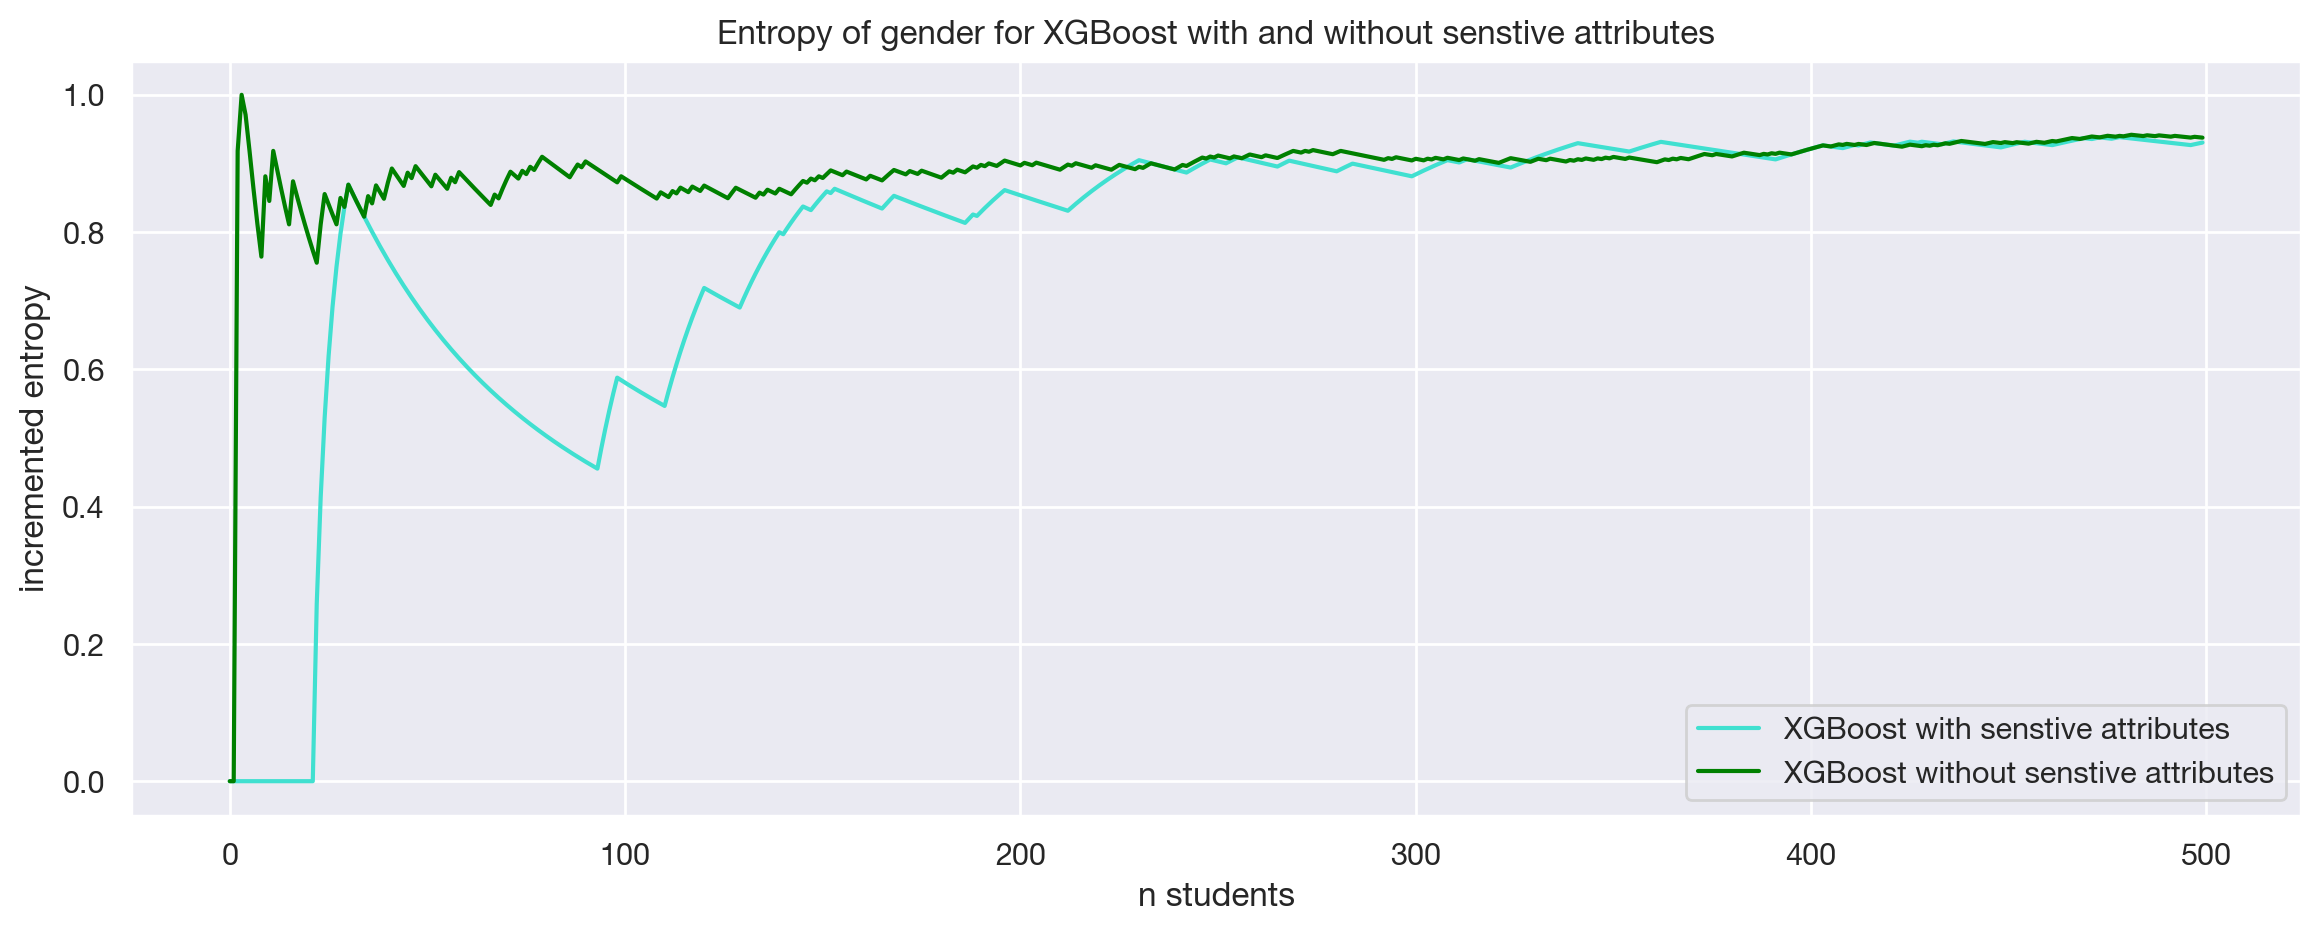

In [206]:
## PLOT TOGETHER

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))
# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_vanilla[:500], color="turquoise") #with
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_wo[:500], color="green") #without


plt.title("Entropy of gender for XGBoost with and without senstive attributes")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()

Inspect the plot by 200

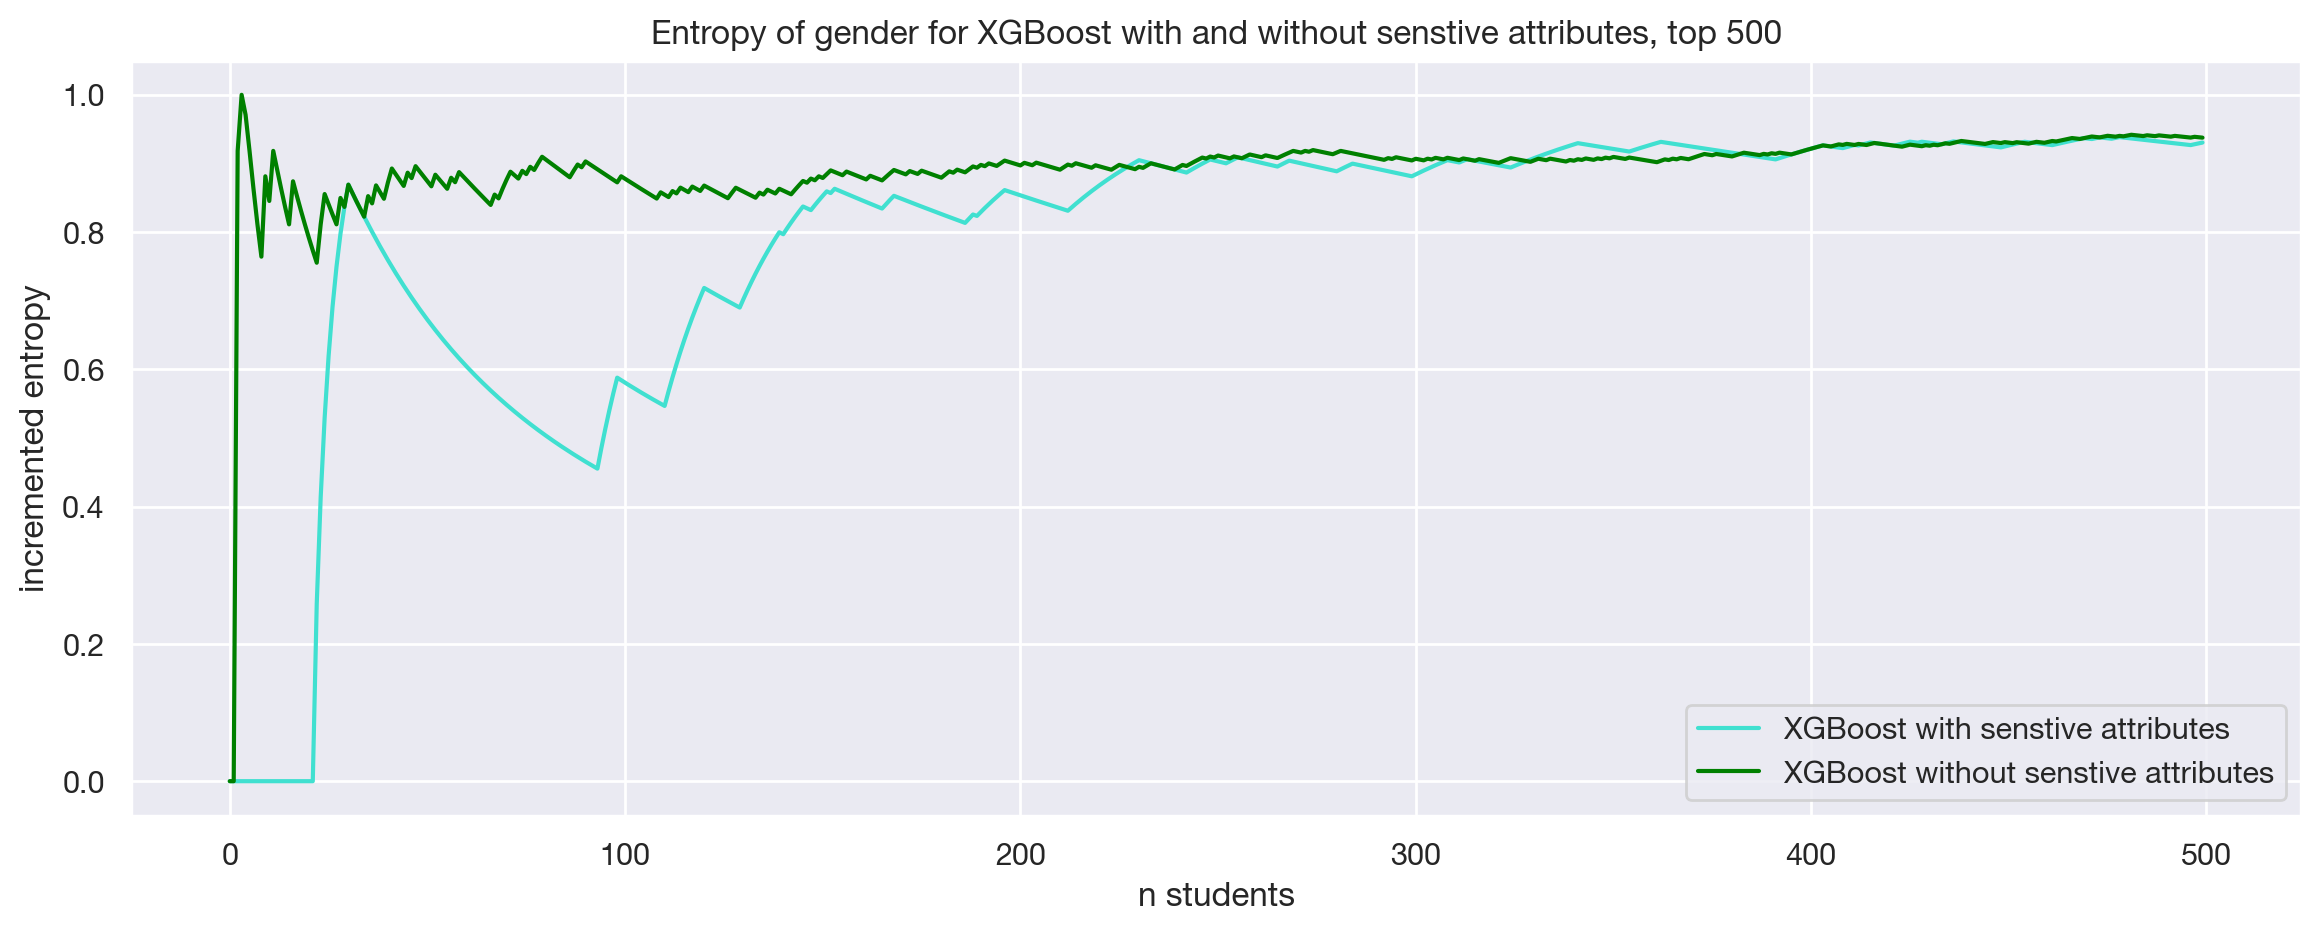

In [207]:
## PLOT TOGETHER, 200

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))


# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_vanilla[:500], color="turquoise") #with
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_wo[:500], color="green") #without


plt.title("Entropy of gender for XGBoost with and without senstive attributes, top 500")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()

### Stratum-gender entropy, both XGboosts

In [208]:
df_xgb_wo


,Unnamed: 0,Idx,Preds,GENDER_bin,STRATUM,value_counts_col_GENDER,entropy_col_GENDER,n_students
0,3746,7490,93.462349,1,Stratum_5,[[1.0]],-0.000000,0
1,1929,5129,93.462349,1,Stratum_4,[[1.0]],-0.000000,1
2,3126,4900,93.462349,0,Stratum_2,"[[0.6666666666666666, 0.3333333333333333]]",0.918296,2
3,1423,8982,93.462349,0,Stratum_3,"[[0.5, 0.5]]",1.000000,3
4,1777,11714,93.462349,0,Stratum_5,"[[0.6, 0.4]]",0.970951,4
...,...,...,...,...,...,...,...,...
4091,1885,6781,22.206335,0,Stratum_1,"[[0.591642228739003, 0.4083577712609971]]",0.975630,4091
4092,306,10129,22.206335,1,Stratum_2,"[[0.591497678964085, 0.408502321035915]]",0.975707,4092
4093,2121,3922,22.206335,0,Stratum_1,"[[0.5915974596971177, 0.40840254030288226]]",0.975654,4093
4094,1949,10156,22.206335,0,Stratum_2,"[[0.5916971916971917, 0.4083028083028083]]",0.975601,4094


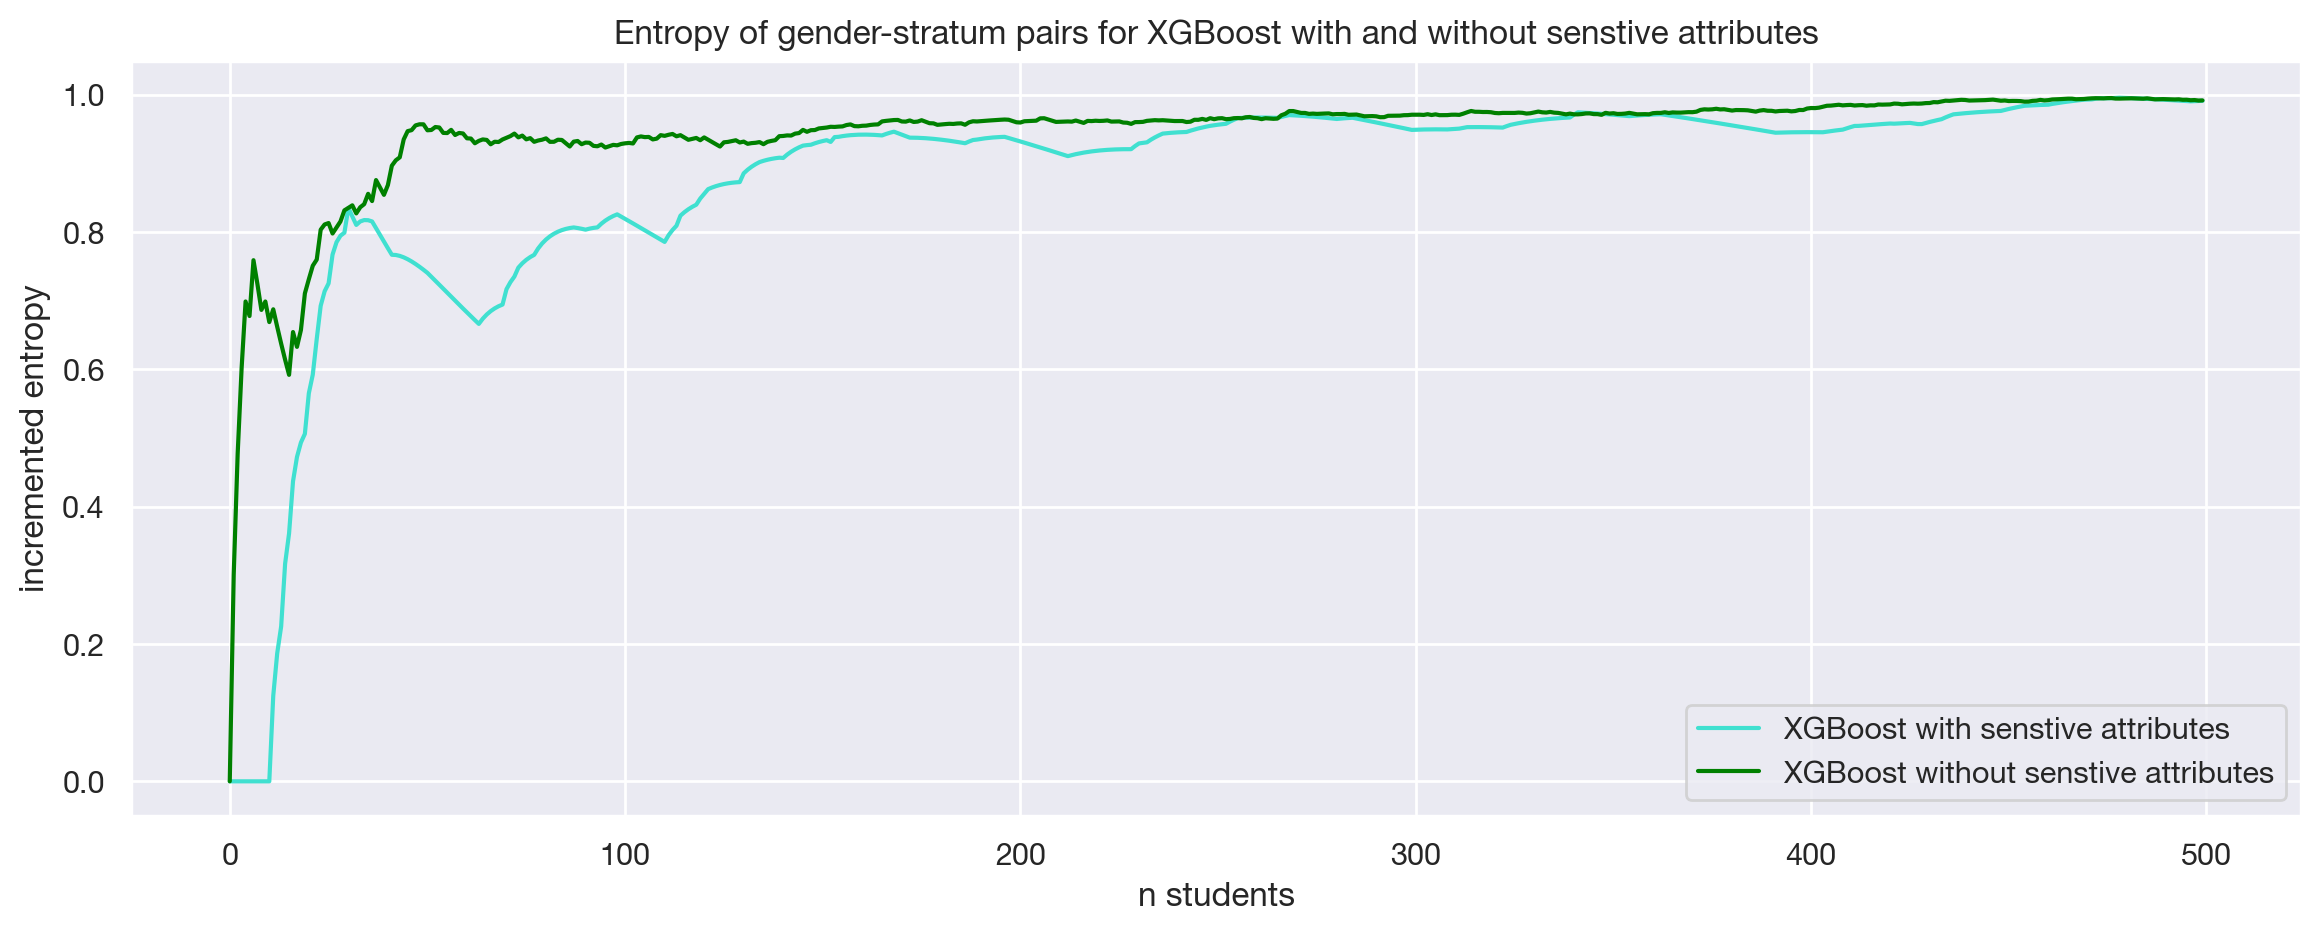

In [209]:
# Function creating gender-startum pair = sg_pair
def sgpair_func(gen, strat):
    #combines startum number and binary gender number in a string:
    for i in range(1,7):
        if gen==1 and strat == "Stratum_{}".format(i):
            return "{}_1".format(i)
        elif gen==0 and strat == "Stratum_{}".format(i):
            return "{}_0".format(i)
        else:
            None

## XGBOOST with sensitive attributes            
            
#stratum gender pair column
df_xgb_vanilla["sg_pair"] = df_xgb_vanilla.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)

#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(df_xgb_vanilla)+1):
    data_value_counts.append(np.array([df_xgb_vanilla["sg_pair"][:i].value_counts(normalize=True)]))

df_xgb_vanilla["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(df_xgb_vanilla)):
    data_entropy.append(-(df_xgb_vanilla["value_counts_col"][i]*np.log10(df_xgb_vanilla["value_counts_col"][i])).sum())


df_xgb_vanilla["entropy_col"] = data_entropy



## XGBOOST without sensitive attributes            

#stratum gender pair column
df_xgb_wo["sg_pair"] = df_xgb_wo.apply(lambda x: sgpair_func(x['GENDER_bin'], x['STRATUM']), axis=1)

#For each row incremented, get ratio of sg-pair(s) and add to df
data_value_counts = []
for i in range(1,len(df_xgb_wo)+1):
    data_value_counts.append(np.array([df_xgb_wo["sg_pair"][:i].value_counts(normalize=True)]))

df_xgb_wo["value_counts_col"] = data_value_counts

#For each row incremented, get entropy of sg-pair(s) and add to df
data_entropy = []
for i in range(len(df_xgb_wo)):
    data_entropy.append(-(df_xgb_wo["value_counts_col"][i]*np.log10(df_xgb_wo["value_counts_col"][i])).sum())


df_xgb_wo["entropy_col"] = data_entropy



## PLOT TOGETHER

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))


# xgb entropy of gender-stratum
sns.lineplot(x="n_students", y="entropy_col", data=df_xgb_vanilla[:500], color="turquoise") #with
sns.lineplot(x="n_students", y="entropy_col", data=df_xgb_wo[:500], color="green") #without


plt.title("Entropy of gender-stratum pairs for XGBoost with and without senstive attributes")
plt.xlabel('n students')
plt.ylabel('incremented entropy')
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,1.05))
plt.legend(["XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()



## All Gender entropies together

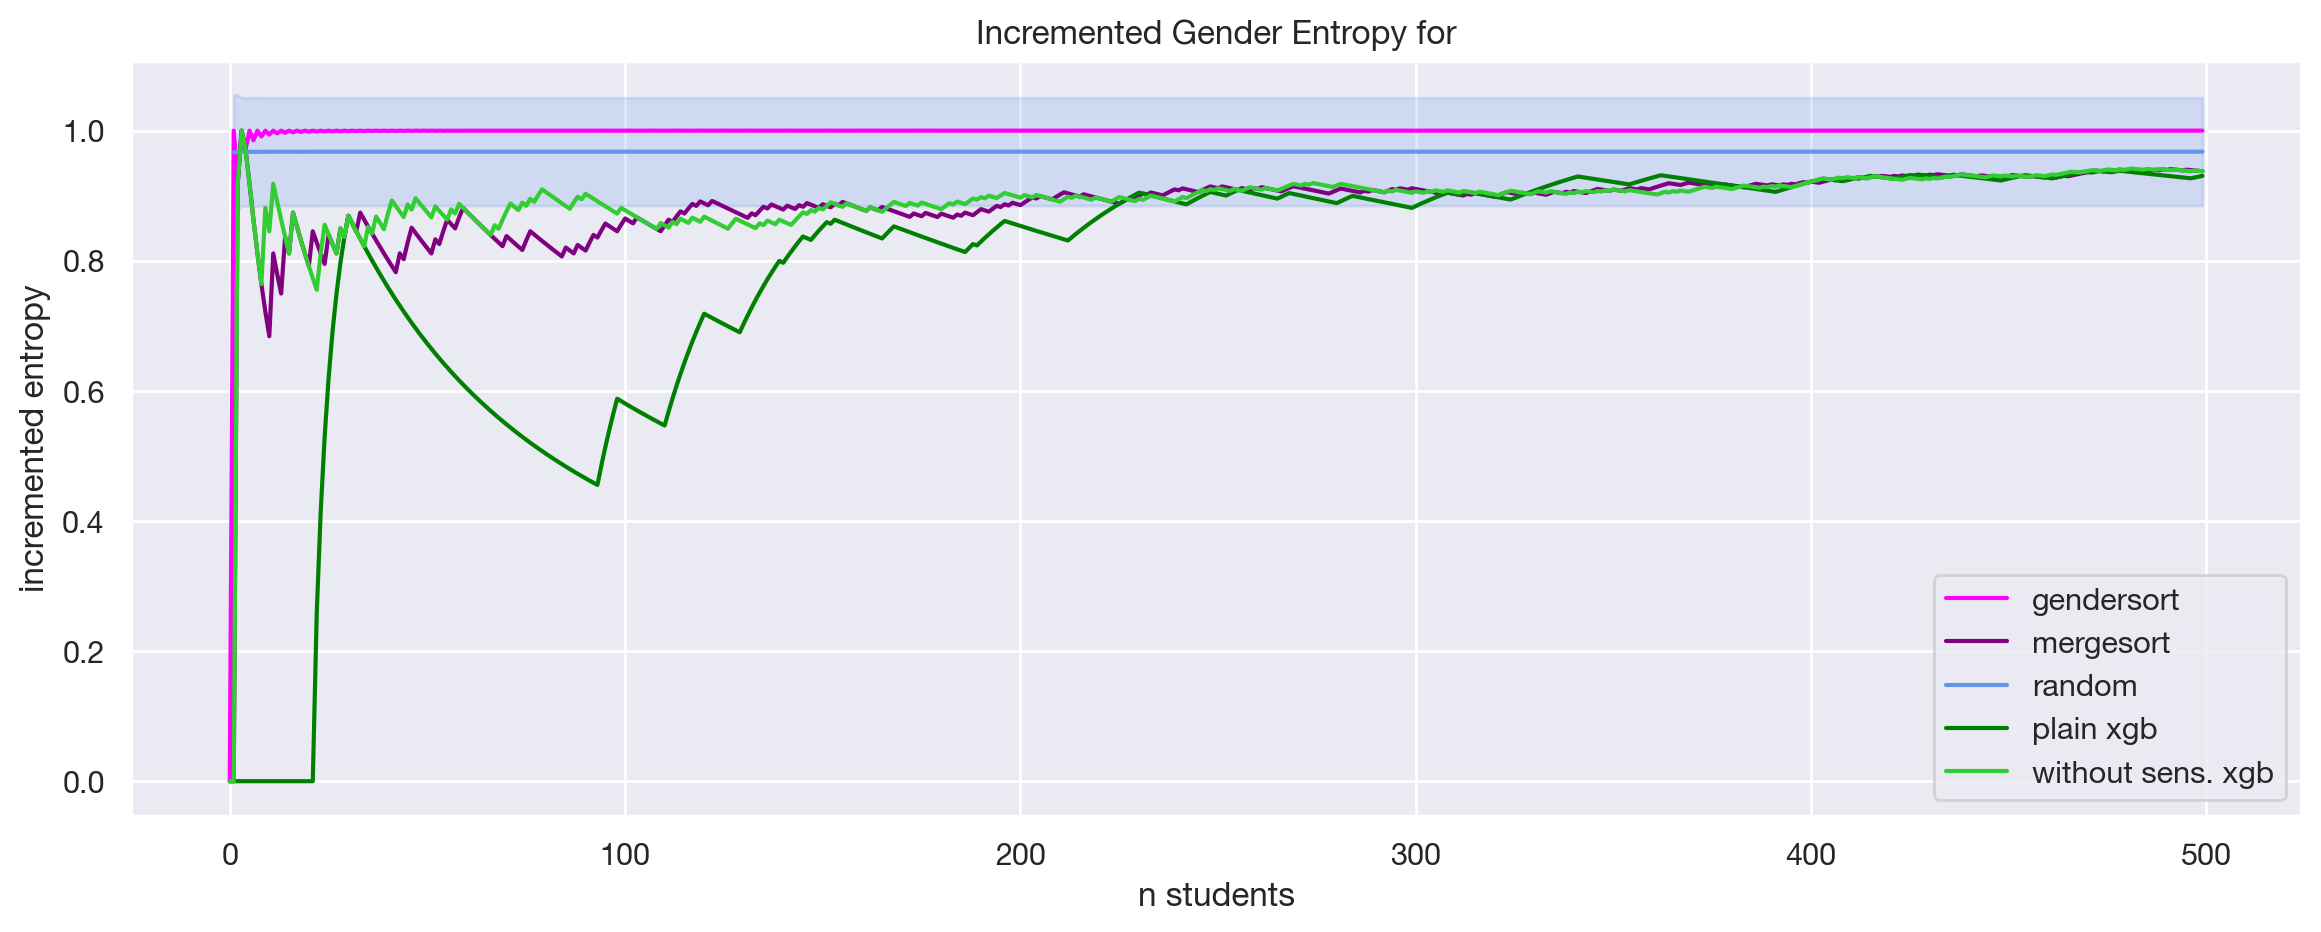

In [213]:
#ENTROPY GENDER gender_sort and merge_sort and random

# list of colors: https://matplotlib.org/stable/gallery/color/named_colors.html

df_sort["n_students"] = range(len(df_sort))

sns.color_palette("deep")

# gendersort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=gender_df[:500], color="magenta")

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_sort[:500], color="purple")

# randomsort entropy of gender
sns.lineplot(data=df_random_use, x="n_students", y="entropy_col_GENDER", ci="sd", color="cornflowerblue")

## XGBOOST

#apply new column of cumsum+1
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))

# mergesort entropy of gender
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_vanilla[:500], color="green") #with
sns.lineplot(x="n_students", y="entropy_col_GENDER", data=df_xgb_wo[:500], color="limegreen") #without


plt.title("Incremented Gender Entropy for")
plt.xlabel('n students')
plt.ylabel('incremented entropy')

plt.legend(["gendersort", "mergesort", "random", "plain xgb", "without sens. xgb"], loc ="lower right")



plt.show()

## All stratum-gender entropies together

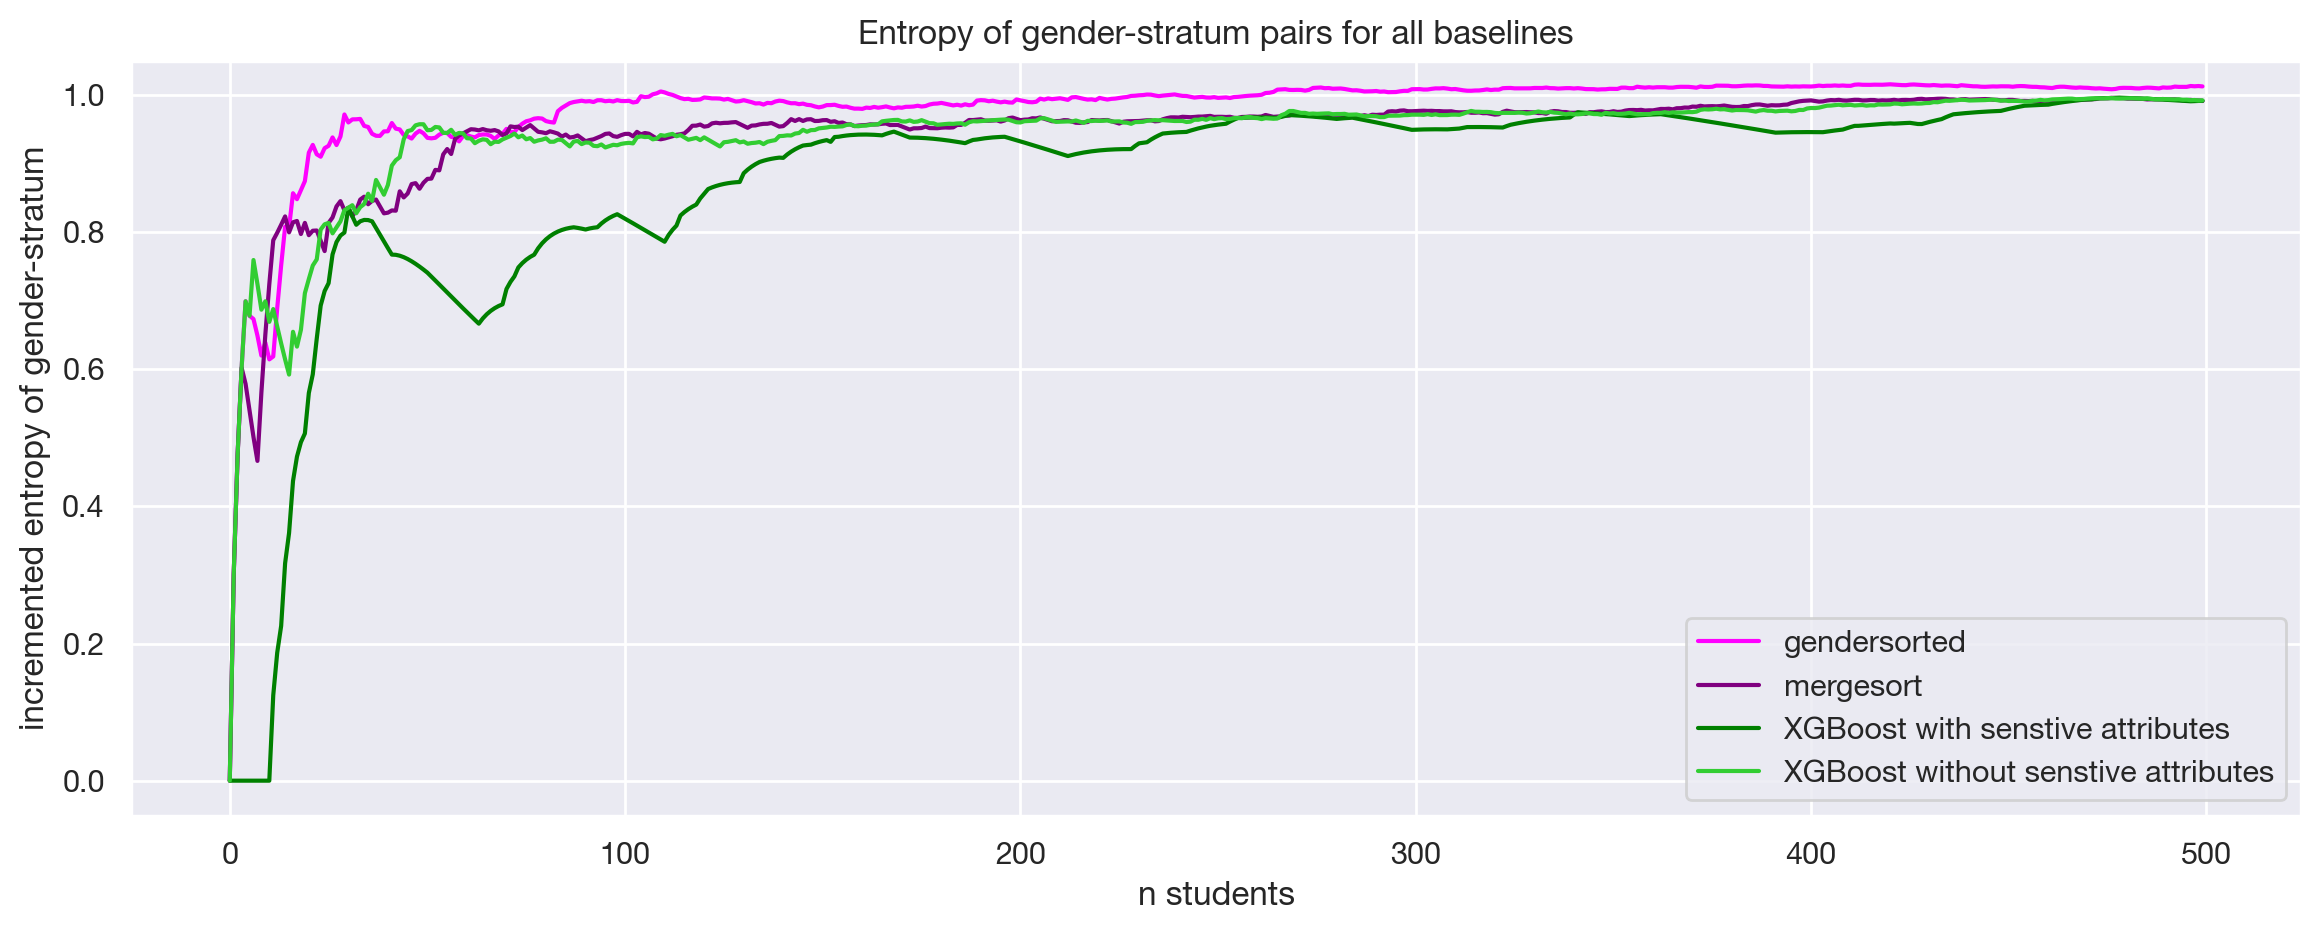

In [211]:
# ADD the other three baselines to the xgboost



# Add new column of cumsum+1 to use for x-axis
df_xgb_vanilla["n_students"] = range(len(df_xgb_vanilla))
df_xgb_wo["n_students"] = range(len(df_xgb_wo))
gender_df["n_students"] = range(len(gender_df))
df_sort["n_students"] = range(len(df_sort)) 



# gendersort and mergesort entropy of gender-stratum
sns.lineplot(x="n_students", y="entropy_col", data=gender_df[:500], color="magenta")
sns.lineplot(x="n_students", y="entropy_col", data=df_sort[:500], color="purple")
# xgb entropy of gender-stratum
sns.lineplot(x="n_students", y="entropy_col", data=df_xgb_vanilla[:500], color="green") #with
sns.lineplot(x="n_students", y="entropy_col", data=df_xgb_wo[:500], color="limegreen") #without



plt.title("Entropy of gender-stratum pairs for all baselines")
plt.xlabel('n students')
plt.ylabel('incremented entropy of gender-stratum')


x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,y1,1.05))
plt.legend(["gendersorted", "mergesort","XGBoost with senstive attributes", "XGBoost without senstive attributes"], loc ="lower right")

plt.show()